In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from  sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/global_Power_plant_database.csv')

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


this are the first five rows of the dataset

In [5]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


this are the last five rows of the dataset

In [6]:
df.sample(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
625,IND,India,RAICHUR STEEL,WRI1019929,35.0,16.3027,77.3608,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,IND,India,DURGAPUR,IND0000108,210.0,23.5310,87.2500,Coal,Oil,NaN,...,WRI,NaN,2018.0,1678.852,1153.653,788.6561,518.2409,832.308,Central Electricity Authority,NaN
252,IND,India,Gulabpura Solar Power Plant,WRI1026144,5.0,25.8600,74.6567,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
849,IND,India,UMTRU (NEW),IND0000478,11.2,26.0069,91.8114,Hydro,NaN,NaN,...,WRI,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,IND,India,Solitaire Solar Power Plant,WRI1026213,15.0,23.9116,71.9324,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


this are some random samples collected from the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

in this dataset 13 features are from ('float64') datatype and the 12 features are from ('object') datatype 

In [8]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

this are the datatypes of the features

In [9]:
df.shape

(908, 25)

this dataset contains 908 rows and the 25 columns

In [10]:
df.columns.tolist()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_data_source',
 'estimated_generation_gwh']

this are the column names of our dataset 

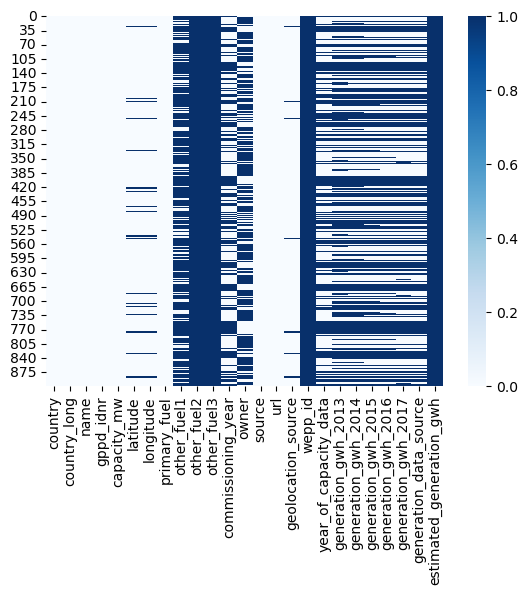

In [11]:
sns.heatmap(df.isnull(),cmap='Blues')
plt.show()

by looking above heatmap we can say this dataset is  having null values. let's handle it 

In [12]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

here we drop some features because that are having only few values and rest of the values are null 

'other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh'      

In [13]:
df.drop(['other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

In [14]:
df.columns.to_list()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_data_source']

here we can see that features are deleted from the dataset

now we have to impute some values in the place of null values

In [15]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())
df['longitude']=df['longitude'].fillna(df['longitude'].mean())
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].mean())
df['owner']=df['owner'].fillna(df['owner'].mode())
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode())
df['year_of_capacity_data']=df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mean())
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['generation_data_source']=df['generation_data_source'].fillna(df['generation_data_source'].mode())

In [16]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1               708
commissioning_year          0
owner                     566
source                      0
url                         0
geolocation_source         19
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_data_source    457
dtype: int64

filled the unique values using Simple Imputer

In [17]:
imp=SimpleImputer(strategy='most_frequent')

In [18]:
df['other_fuel1']=imp.fit_transform(df['other_fuel1'].values.reshape(-1,1))
df['owner']=imp.fit_transform(df['owner'].values.reshape(-1,1))
df['geolocation_source']=imp.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['generation_data_source']=imp.fit_transform(df['generation_data_source'].values.reshape(-1,1))

In [19]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

now we have filled all the null values now our dataset is ready for the further analysis

In [20]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')
    

IND    908
Name: country, dtype: int64


India    908
Name: country_long, dtype: int64


ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADAMPARI                  1
KADANA                     1
KADRA                      1
KAHALGAON                  1
iEnergy Theni Wind Farm    1
Name: name, Length: 908, dtype: int64


WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000166    1
IND0000167    1
IND0000168    1
IND0000169    1
WRI1026761    1
Name: gppd_idnr, Length: 908, dtype: int64


5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
645.0      1
41.4       1
17.5       1
445.0      1
106.6      1
Name: capacity_mw, Length: 365, dtype: int64


21.196189    46
19.000400     3
24.191700     3
31.268000     2
14.235200     2
             ..
22.755400     1
27.159800     1
17.297000    

In [21]:
df.nunique().to_frame()

,0
country,1
country_long,1
name,908
gppd_idnr,908
capacity_mw,365
latitude,838
longitude,829
primary_fuel,8
other_fuel1,3
commissioning_year,74


# Separating the features

In [22]:
categorical_col=[]
numerical_col=[]
for i in df.columns:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
    else:
        categorical_col.append(i)
        
        
print(categorical_col)
print(numerical_col)

        
    

['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']
['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']


In [23]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.0,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.088110,4.781201,12.994825,0.0,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1996.876894,2018.0,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,21.278850,76.978950,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,25.183775,79.211600,2003.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


in the feature  capacity_mw mean value is greater than the median(50%) percentile value it means this feature is right skewed 

and also in this dataset features are having some difference between their (75%) percentile and the (100%) percentile it means there might be some outliers are present in the dataset.

# Data Analysis

In [24]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.000000,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,1996.876894,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,1996.876894,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority


<Axes: xlabel='capacity_mw', ylabel='Density'>

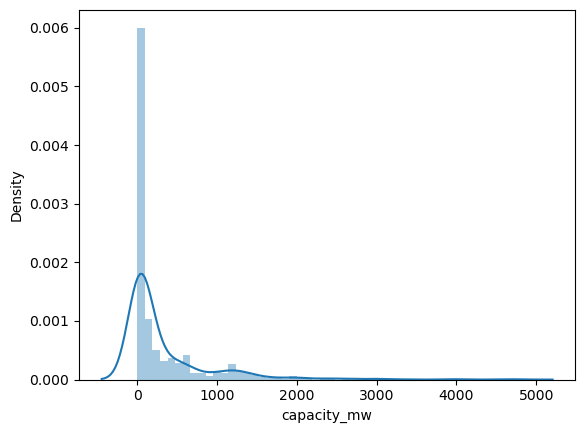

In [25]:
sns.distplot(df['capacity_mw'])


21.279
21.196
0    21.196
Name: latitude, dtype: float64


<Axes: xlabel='latitude', ylabel='Density'>

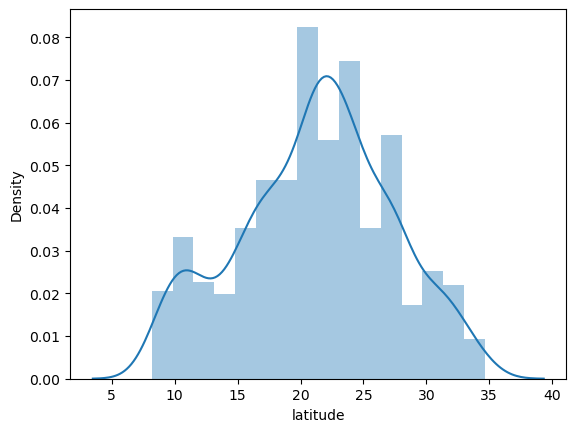

In [26]:
print(round(df['latitude'].quantile(.50),3))
print(round(df['latitude'].mean(),3))
print(round(df['latitude'].mode(),3))
sns.distplot(df['latitude'])


here we can say by looking the above distribution plot the latitude feature is normally distributed because it's (mean, median, mode) all the values are almost simmilar

76.979
77.448
0    77.0
Name: longitude, dtype: float64 3


<Axes: xlabel='longitude', ylabel='Density'>

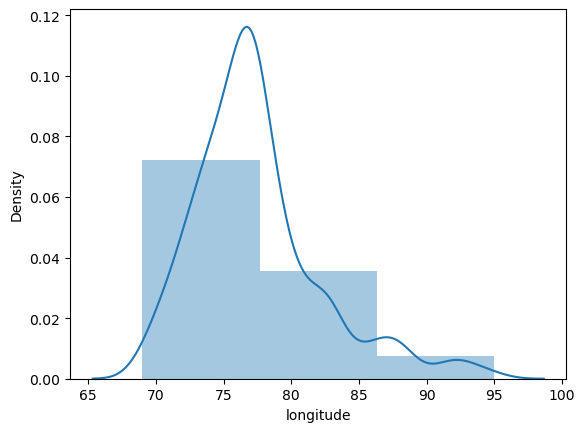

In [27]:
print(round(df['longitude'].quantile(.50),3))
print(round(df['longitude'].mean(),3))
print(round(df['longitude'].mode()),3)
sns.distplot(round(df['longitude']),3)

the longitude feature is also almost normally distributed 

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64


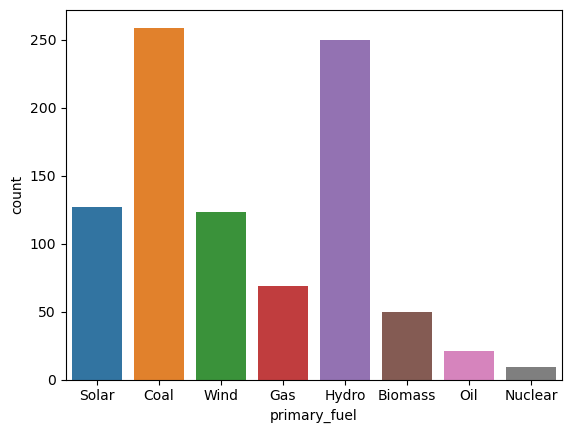

In [28]:
print(df['primary_fuel'].value_counts())
sns.countplot(x='primary_fuel',data=df)
plt.show()

as we can see in the above countplot the count of 'coal' and 'Hydro' is high than the other energy sources

In [29]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.000000,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,1996.876894,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,1996.876894,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority


Oil             905
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


<Axes: xlabel='other_fuel1', ylabel='count'>

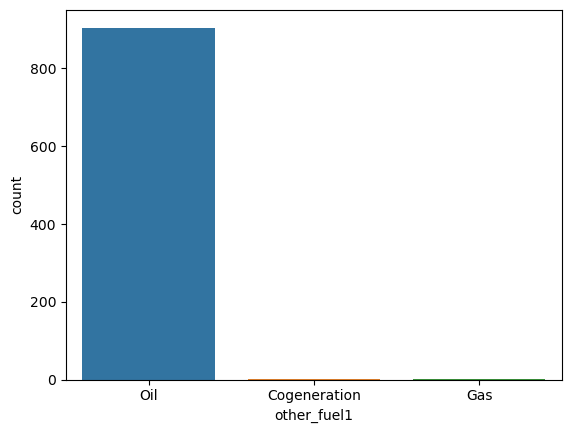

In [30]:
print(df['other_fuel1'].value_counts())
sns.countplot(x='other_fuel1',data=df)


it is mainly using oil that's why the 'oil' count is high 

<Axes: xlabel='commissioning_year', ylabel='capacity_mw'>

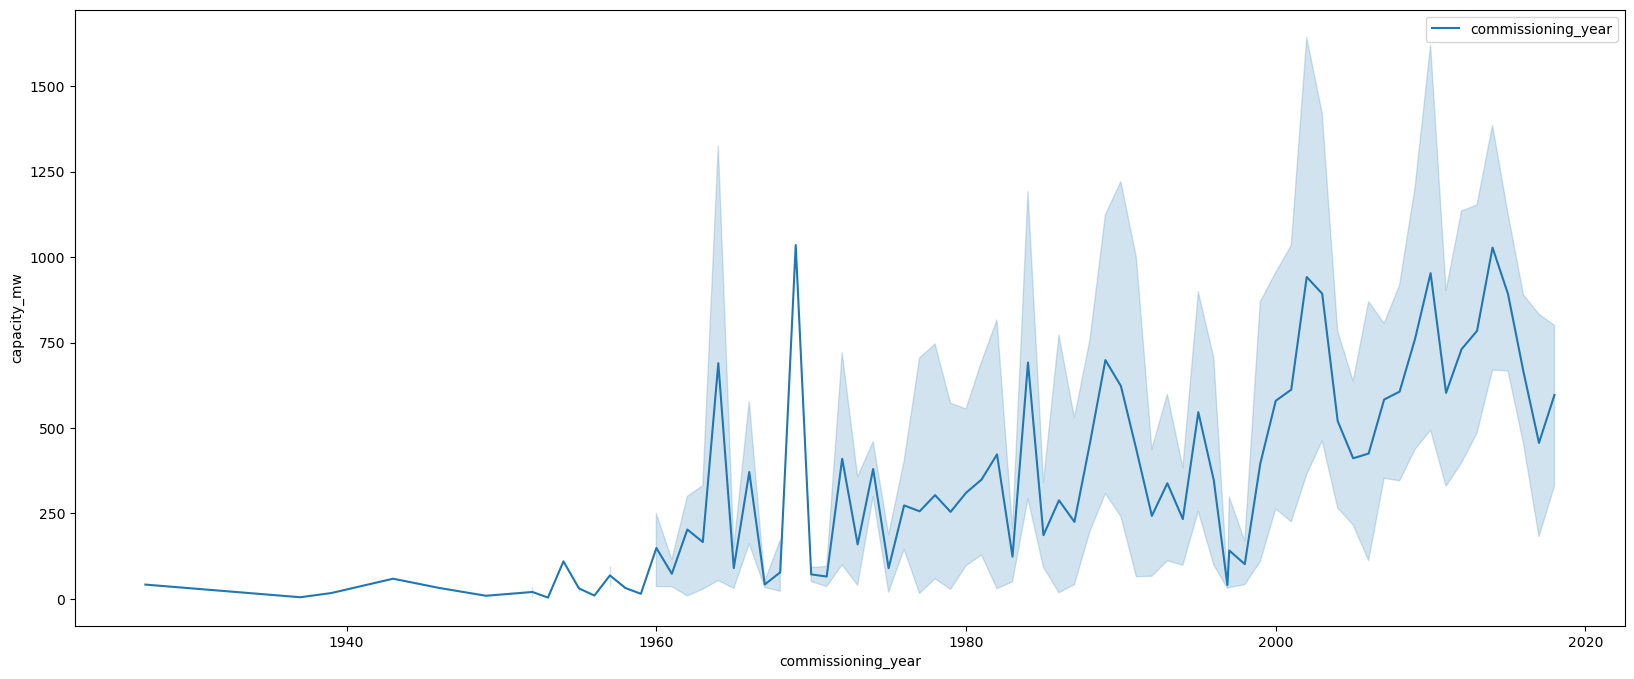

In [31]:
plt.figure(figsize=(20,8))
sns.lineplot(x=df.commissioning_year,y=df.capacity_mw, label='commissioning_year')


the capacity_mw value is high between the year of 2000 to  2020

2018.0    908
Name: year_of_capacity_data, dtype: int64


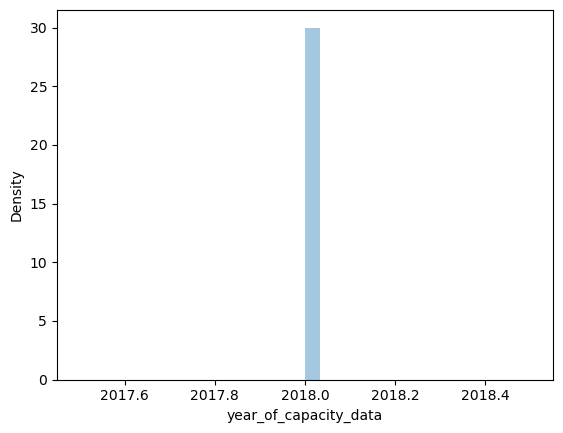

In [32]:
print(df['year_of_capacity_data'].value_counts())
sns.distplot(df['year_of_capacity_data'])
plt.show()

In [33]:
col_list=['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']

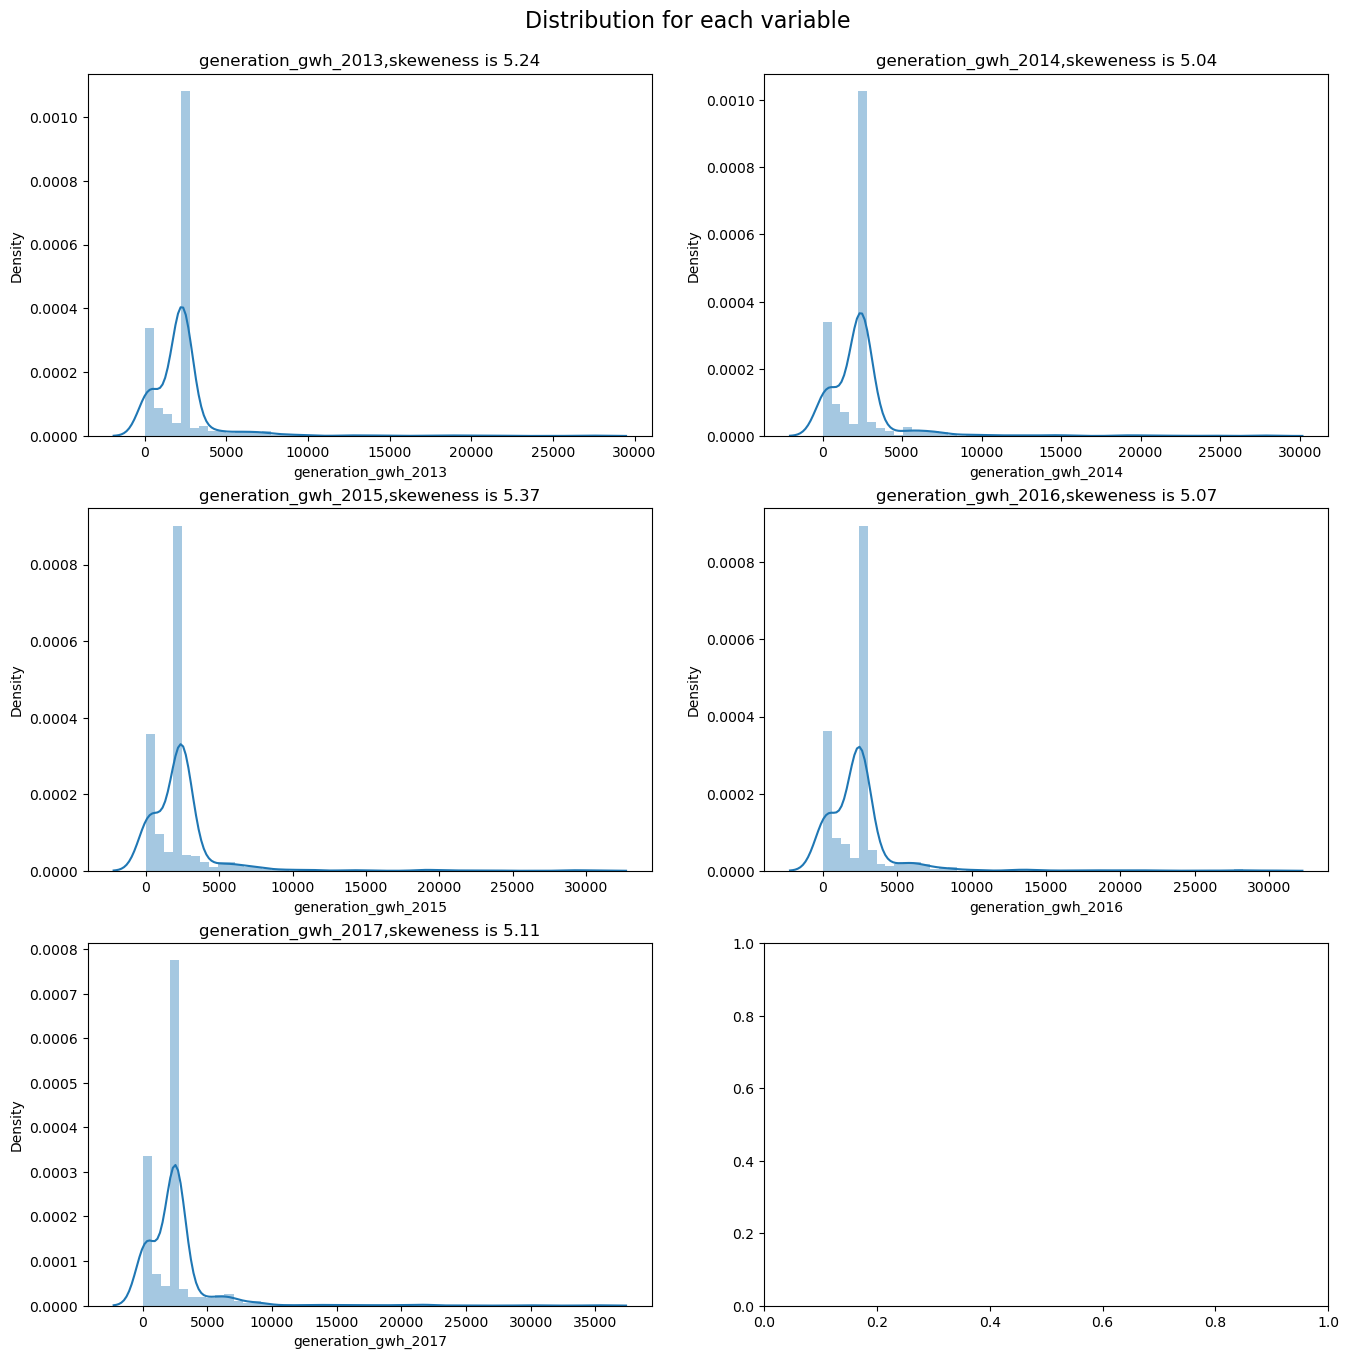

In [34]:
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows,cols,figsize=(16,16))
    fig.suptitle(suptitle, y=0.92, size=16)
    axs = axs.flatten()
    for i,data in enumerate(columns_list):
        sns.distplot(dataset[data], ax=axs[i])
        axs[i].set_title(data + ',skeweness is '+str(round(dataset[data].skew(axis= 0, skipna = True),2)))
    
dist_custom(dataset=df, columns_list=col_list,rows=3, cols=2, suptitle='Distribution for each variable')

In [35]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.000000,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,1996.876894,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,1996.876894,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.000000,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000,Central Electricity Authority
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,1996.876894,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,1996.876894,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,1996.876894,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority


# Bivariate Analysis

<Axes: xlabel='latitude', ylabel='longitude'>

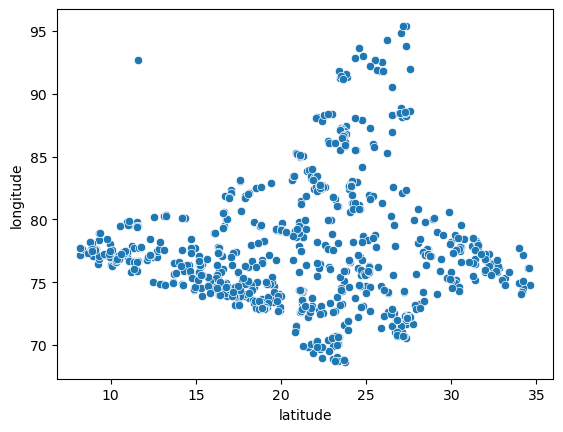

In [36]:
sns.scatterplot(x='latitude',y='longitude',data=df)


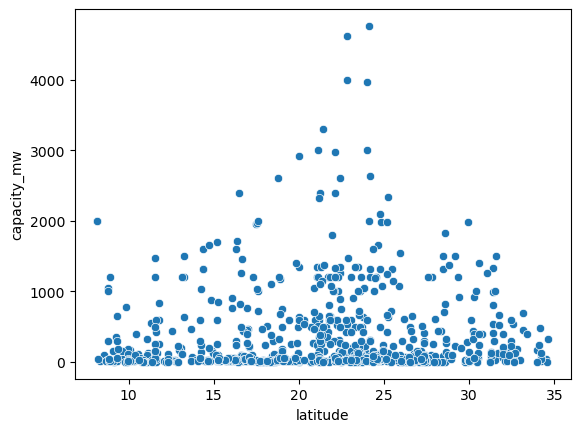

In [37]:
sns.scatterplot(x='latitude',y='capacity_mw',data=df)
plt.show()

<Axes: xlabel='longitude', ylabel='capacity_mw'>

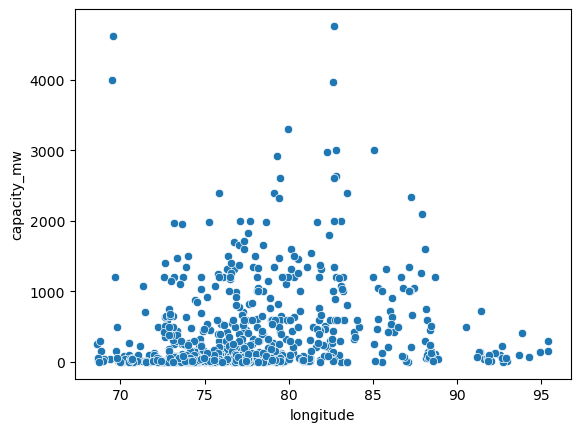

In [38]:
sns.scatterplot(x='longitude',y='capacity_mw',data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2013'>

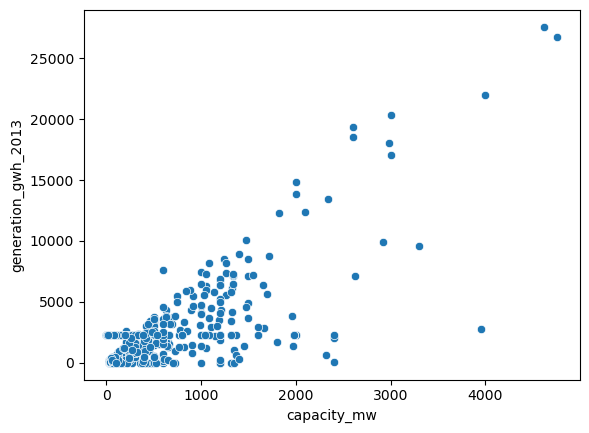

In [39]:
sns.scatterplot(x='capacity_mw',y='generation_gwh_2013',data=df)


In [40]:
col_list

['generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017']

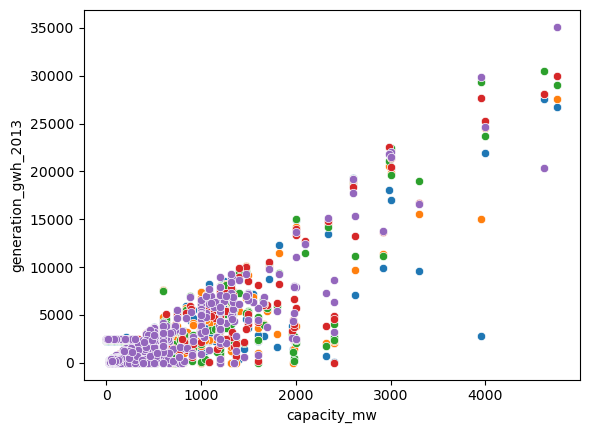

In [41]:
for i in col_list:
    sns.scatterplot(x='capacity_mw',y=i, data=df)
    

as we can say the generation_gwh (2013,2014,2015,2016,2017) are highly correlated with the capacity_mw 

<Axes: xlabel='generation_gwh_2013', ylabel='generation_gwh_2014'>

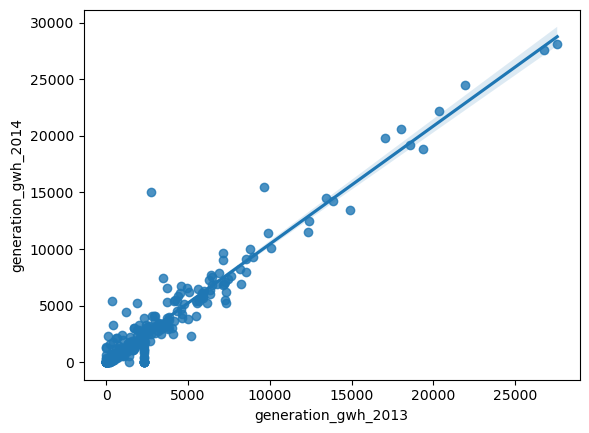

In [42]:
sns.regplot(x='generation_gwh_2013',y='generation_gwh_2014',data=df)


<Axes: xlabel='generation_gwh_2013', ylabel='generation_gwh_2015'>

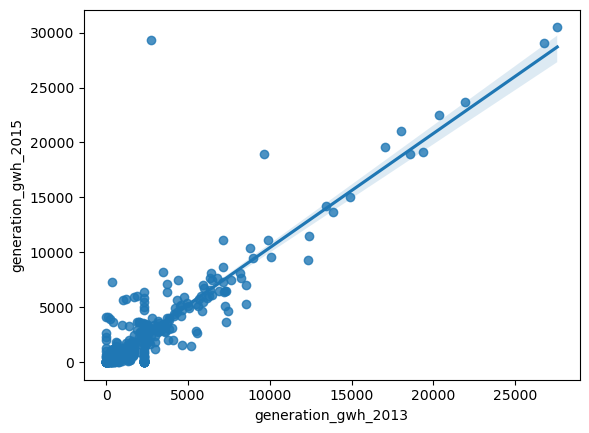

In [43]:
sns.regplot(x='generation_gwh_2013',y='generation_gwh_2015',data=df)


<Axes: xlabel='generation_gwh_2013', ylabel='generation_gwh_2016'>

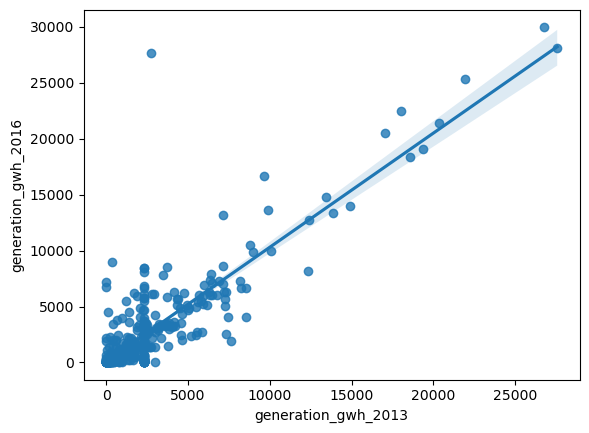

In [44]:
sns.regplot(x='generation_gwh_2013',y='generation_gwh_2016',data=df)

<Axes: xlabel='generation_gwh_2013', ylabel='generation_gwh_2017'>

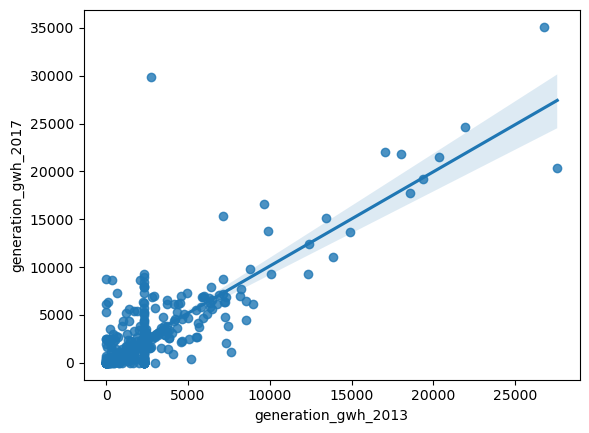

In [45]:
sns.regplot(x='generation_gwh_2013',y='generation_gwh_2017',data=df)

# Multivariate analysis

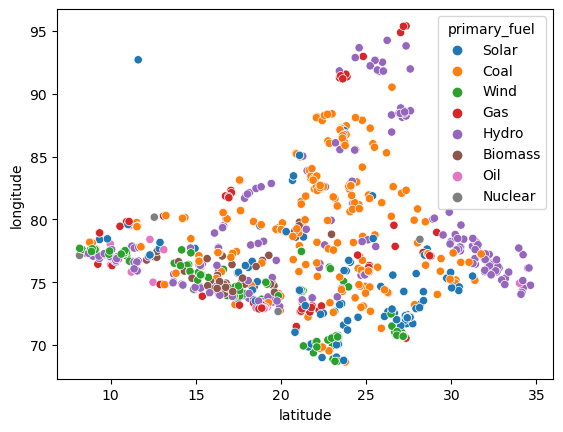

In [46]:
sns.scatterplot(x='latitude',y='longitude',hue='primary_fuel',data=df)
plt.show()

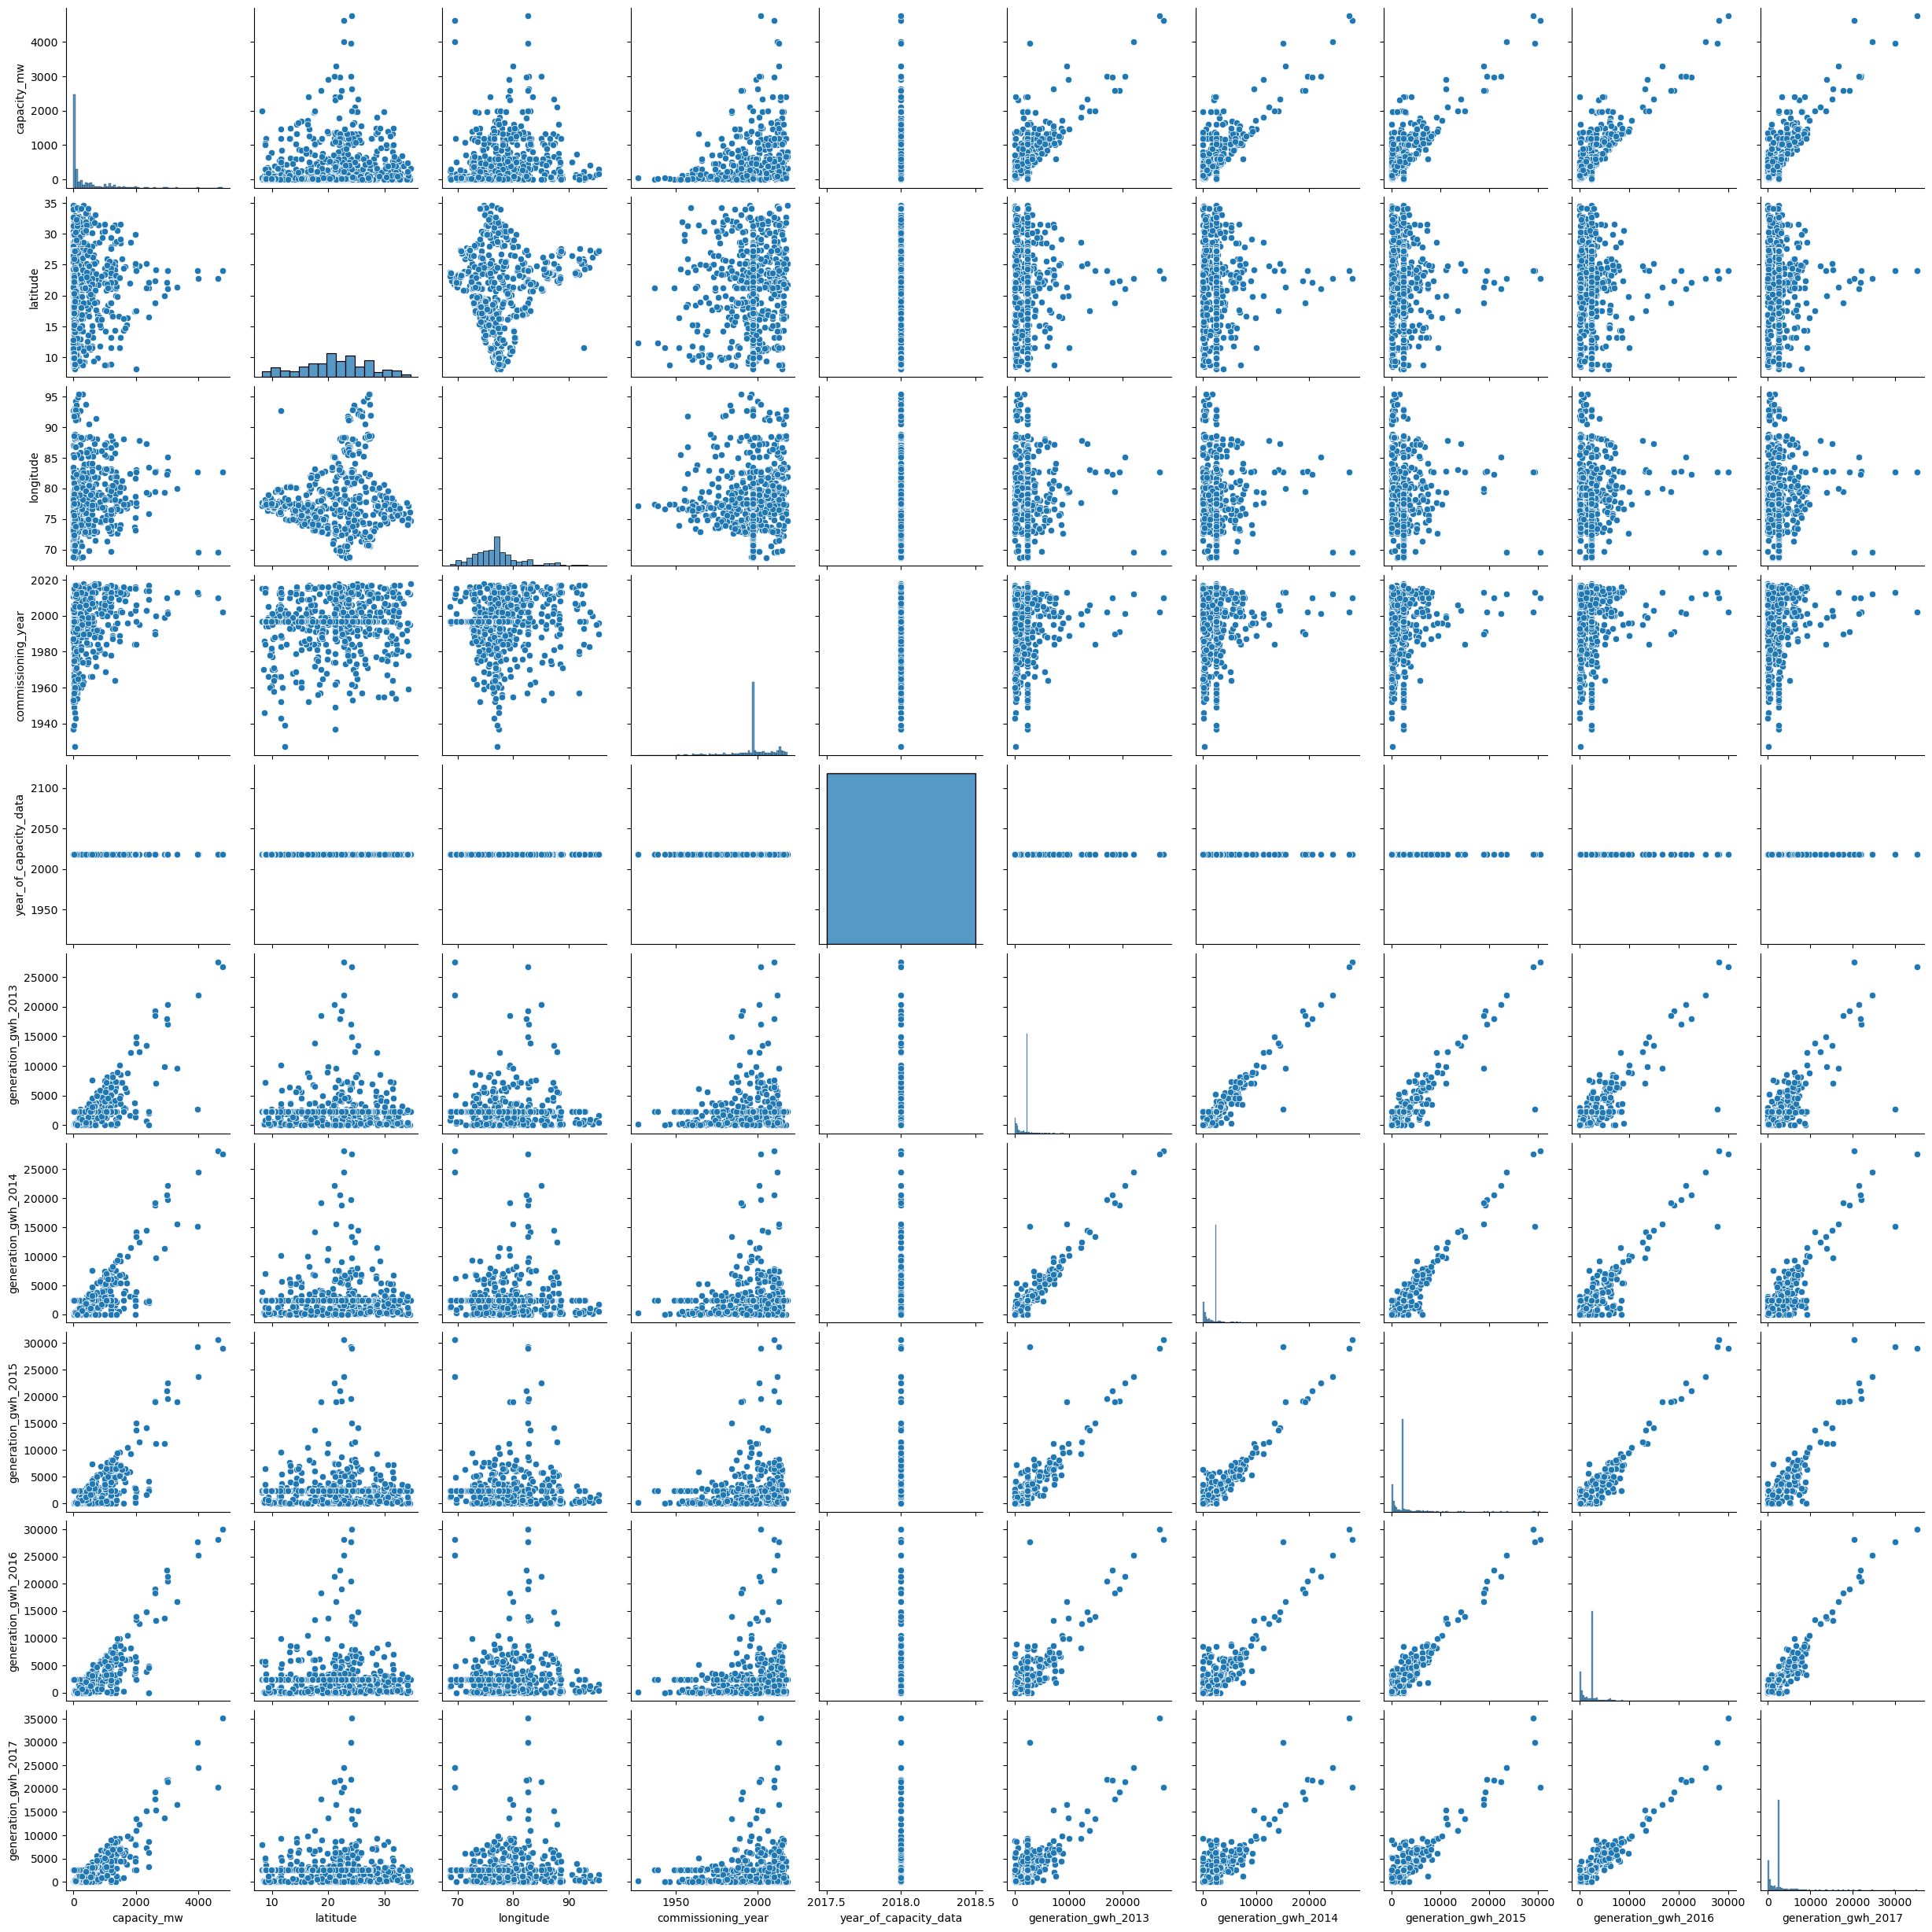

In [47]:
sns.pairplot(df)

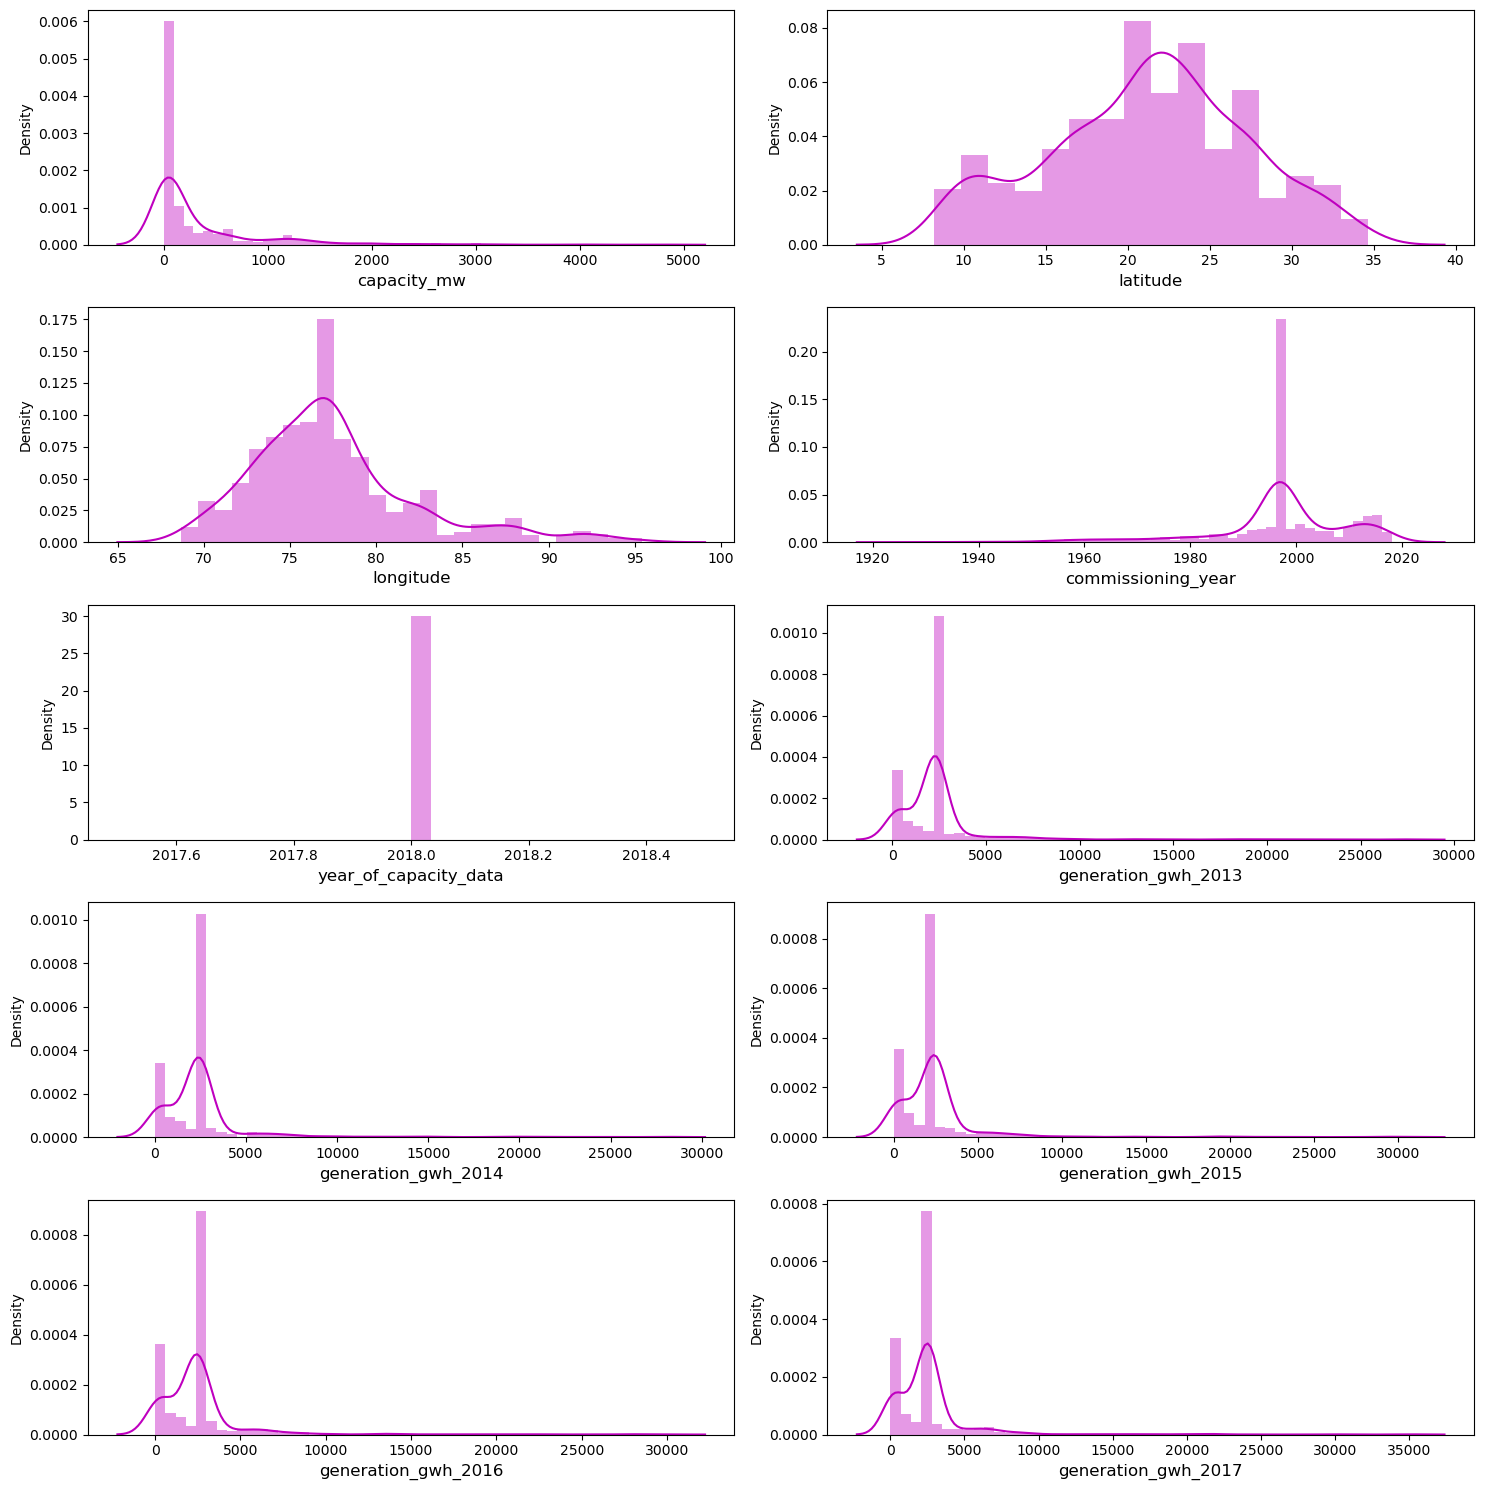

In [48]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=11:
        ax=plt.subplot(5,2, plotnumber)
        sns.distplot(df[col],color = 'm')
        plt.xlabel(col, fontsize =12)
        plt.yticks(rotation=0,fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

# Checking outliers

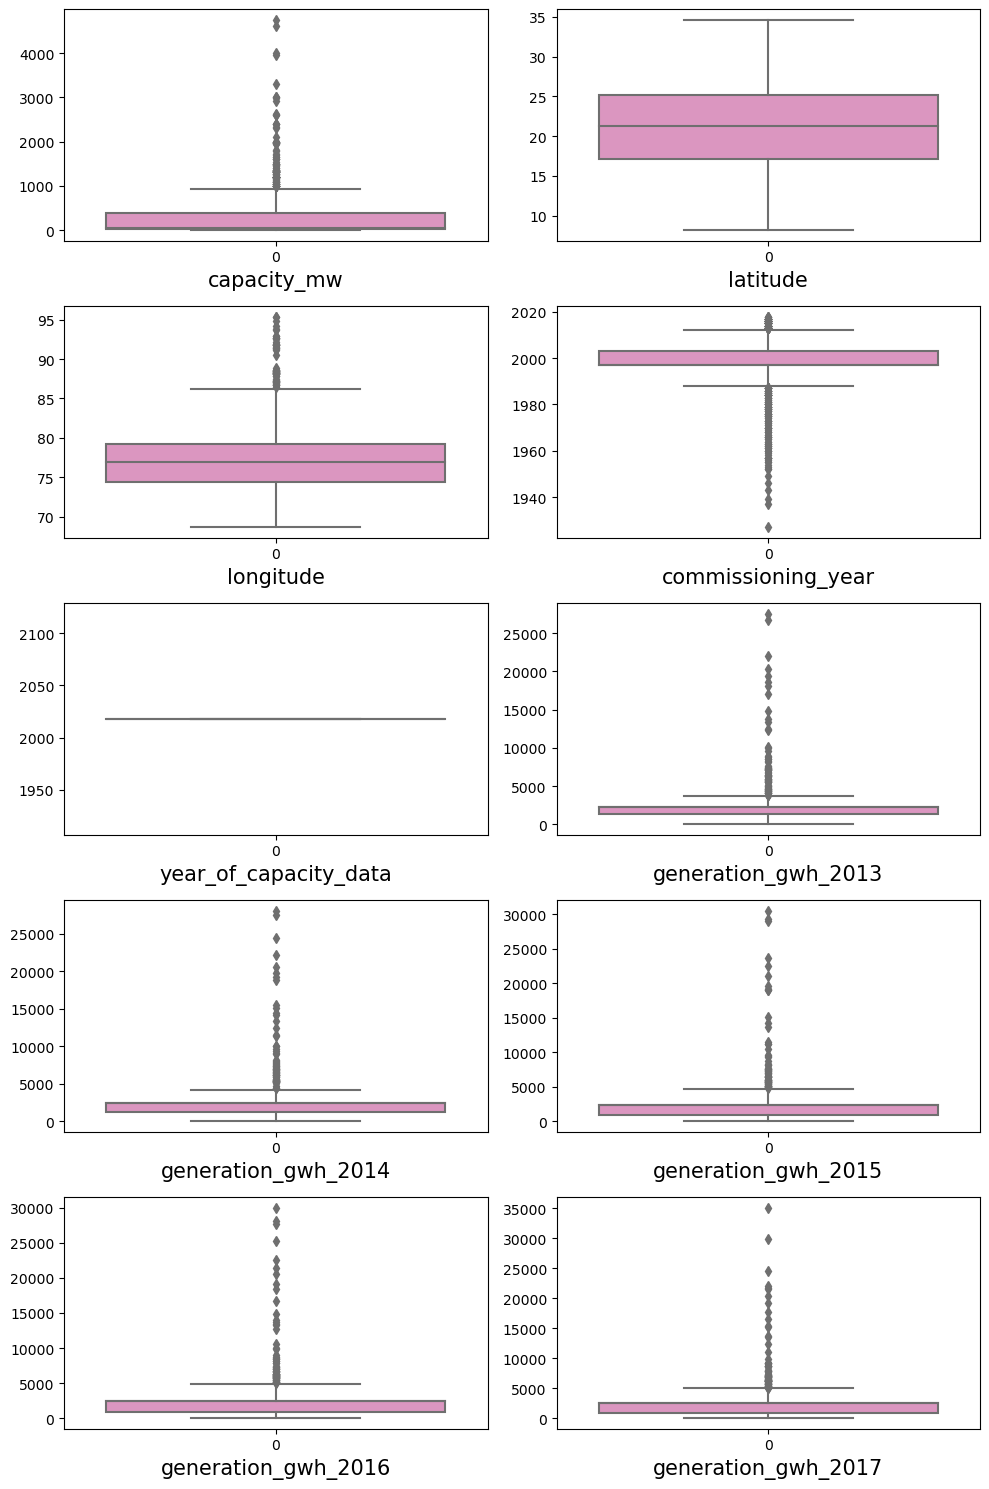

In [49]:
# Lets check the outliers by plotting boxplot

plt.figure(figsize=(10,15),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=11:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(df[col],palette='Set2_r')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [50]:
df.skew()

capacity_mw              3.193257
latitude                -0.147391
longitude                1.129836
commissioning_year      -1.383330
year_of_capacity_data    0.000000
generation_gwh_2013      5.241491
generation_gwh_2014      5.041961
generation_gwh_2015      5.367370
generation_gwh_2016      5.071758
generation_gwh_2017      5.111938
dtype: float64

In [51]:
df['longitude']=np.sqrt(df['longitude'])
df['latitude']=np.sqrt(df['latitude'])
df['commission_year']=np.sqrt(df['commissioning_year'])
df['year_of_capacity_data']=np.sqrt(df['year_of_capacity_data'])
df['generation_gwh_2013']=np.sqrt(df['generation_gwh_2013'])
df['generation_gwh_2014']=np.sqrt(df['generation_gwh_2014'])
df['generation_gwh_2015']=np.sqrt(df['generation_gwh_2015'])
df['generation_gwh_2016']=np.sqrt(df['generation_gwh_2016'])
df['generation_gwh_2017']=np.sqrt(df['generation_gwh_2017'])

In [52]:
df.skew()

capacity_mw              3.193257
latitude                -0.485528
longitude                1.025038
commissioning_year      -1.383330
year_of_capacity_data    0.000000
generation_gwh_2013      1.037355
generation_gwh_2014      0.988517
generation_gwh_2015      1.057697
generation_gwh_2016      0.982545
generation_gwh_2017      0.901027
commission_year         -1.400799
dtype: float64

Here we have reduced the skewness 

# Encoding Categorical columns

In [53]:
# Encoding categorical columns using ordinalEncoder

OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
        
df


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,commission_year
0,0.0,0.0,0.0,658.0,2.5,5.308851,8.558078,6.0,2.0,2011.000000,...,128.0,1.0,44.922155,48.000617,49.197493,49.133210,49.537221,50.316543,0.0,44.844175
1,0.0,0.0,1.0,520.0,98.0,4.976575,8.637650,1.0,2.0,1996.876894,...,173.0,2.0,44.922155,48.000617,49.197493,49.133210,49.537221,50.316543,0.0,44.686429
2,0.0,0.0,2.0,854.0,39.2,4.680150,8.329058,7.0,2.0,1996.876894,...,205.0,2.0,44.922155,48.000617,49.197493,49.133210,49.537221,50.316543,0.0,44.686429
3,0.0,0.0,3.0,0.0,135.0,4.885816,9.558253,2.0,2.0,2004.000000,...,58.0,2.0,44.922155,25.135193,24.855367,29.047323,29.765827,25.763822,0.0,44.766059
4,0.0,0.0,4.0,1.0,1800.0,4.686182,9.077946,1.0,2.0,2015.000000,...,58.0,2.0,44.922155,40.844706,55.095826,76.917943,79.012657,73.386509,0.0,44.888751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0.0,0.0,903.0,494.0,1600.0,4.036694,8.795271,1.0,2.0,2016.000000,...,58.0,2.0,44.922155,48.000617,49.197493,0.997434,15.283869,29.417682,0.0,44.899889
904,0.0,0.0,904.0,823.0,3.0,3.590710,8.841120,6.0,2.0,1996.876894,...,22.0,0.0,44.922155,48.000617,49.197493,49.133210,49.537221,50.316543,0.0,44.686429
905,0.0,0.0,905.0,892.0,25.5,3.908427,8.693739,7.0,2.0,1996.876894,...,260.0,2.0,44.922155,48.000617,49.197493,49.133210,49.537221,50.316543,0.0,44.686429
906,0.0,0.0,906.0,540.0,80.0,4.934572,8.587648,1.0,2.0,1996.876894,...,82.0,2.0,44.922155,48.000617,49.197493,49.133210,49.537221,50.316543,0.0,44.686429


In [54]:
df.describe()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,commission_year
count,908.0,908.0,908.00000,908.00000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,...,908.000000,908.000000,9.080000e+02,908.000000,908.000000,908.000000,908.000000,908.000000,908.0,908.000000
mean,0.0,0.0,453.50000,453.50000,321.046378,4.551804,8.796383,3.205947,1.995595,1996.876894,...,94.429515,1.733480,4.492215e+01,43.420431,44.132422,43.493038,43.738481,44.417766,0.0,44.686191
std,0.0,0.0,262.26132,262.26132,580.221767,0.691226,0.267539,2.281339,0.081214,12.994825,...,70.352824,0.676835,6.611689e-13,20.474059,21.754168,22.869281,23.269677,23.652328,0.0,0.145732
min,0.0,0.0,0.00000,0.00000,0.000000,2.858129,8.285210,0.000000,0.000000,1927.000000,...,0.000000,0.000000,4.492215e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,43.897608
25%,0.0,0.0,226.75000,226.75000,16.837500,4.130112,8.624978,1.000000,2.000000,1996.876894,...,58.000000,2.000000,4.492215e+01,36.503656,34.281680,29.566932,28.751150,29.195954,0.0,44.686429
50%,0.0,0.0,453.50000,453.50000,60.000000,4.612900,8.773765,3.000000,2.000000,1996.876894,...,58.000000,2.000000,4.492215e+01,48.000617,49.197493,49.133210,49.537221,50.316543,0.0,44.686429
75%,0.0,0.0,680.25000,680.25000,388.125000,5.018344,8.900090,6.000000,2.000000,2003.000000,...,115.250000,2.000000,4.492215e+01,48.000617,49.197493,49.133210,49.537221,50.316543,0.0,44.754888
max,0.0,0.0,907.00000,907.00000,4760.000000,5.886340,9.767702,7.000000,2.000000,2018.000000,...,303.000000,2.000000,4.492215e+01,166.090939,167.711061,174.754113,173.248377,187.392636,0.0,44.922155


as we can see in this dataset we do not have any null values after encoding the categorical columns

# Correlation between target variable and independent variables.

In [55]:
cor=df.corr()
cor

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,commission_year
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,NaN,NaN,1.000000,0.336792,0.059870,-0.135441,0.019685,0.038752,-0.074643,-0.041884,...,0.042711,0.035528,NaN,0.074892,0.073801,0.058832,0.053750,0.066676,NaN,-0.041944
gppd_idnr,NaN,NaN,0.336792,1.000000,-0.334308,-0.095886,-0.383516,0.607373,0.001812,0.041601,...,0.596994,-0.464119,NaN,0.218133,0.224772,0.227520,0.209035,0.199278,NaN,0.042574
capacity_mw,NaN,NaN,0.059870,-0.334308,1.000000,0.055623,0.199275,-0.377783,0.002672,0.265827,...,-0.243176,0.204698,NaN,0.505250,0.527159,0.544498,0.577887,0.592459,NaN,0.265121
latitude,NaN,NaN,-0.135441,-0.095886,0.055623,1.000000,0.026893,-0.026028,0.033310,0.106118,...,-0.128596,-0.184419,NaN,0.051361,0.073735,0.064591,0.072098,0.053275,NaN,0.106071
longitude,NaN,NaN,0.019685,-0.383516,0.199275,0.026893,1.000000,-0.353761,0.030346,0.085344,...,-0.306105,0.257011,NaN,-0.057224,-0.070027,-0.075072,-0.040562,-0.054982,NaN,0.084639
primary_fuel,NaN,NaN,0.038752,0.607373,-0.377783,-0.026028,-0.353761,1.000000,0.004902,-0.123060,...,0.589348,-0.482803,NaN,-0.035313,-0.031457,-0.029838,-0.038554,-0.032327,NaN,-0.122287
other_fuel1,NaN,NaN,-0.074643,0.001812,0.002672,0.033310,0.030346,0.004902,1.000000,0.036050,...,0.028118,-0.021383,NaN,0.041308,0.036000,0.047493,0.055528,0.027893,NaN,0.036020
commissioning_year,NaN,NaN,-0.041884,0.041601,0.265827,0.106118,0.085344,-0.123060,0.036050,1.000000,...,0.011064,-0.007959,NaN,0.138909,0.157835,0.167144,0.197500,0.178559,NaN,0.999995


this gives the correlation between the dependent and independent variables . we can visualize this by plotting heatmap.

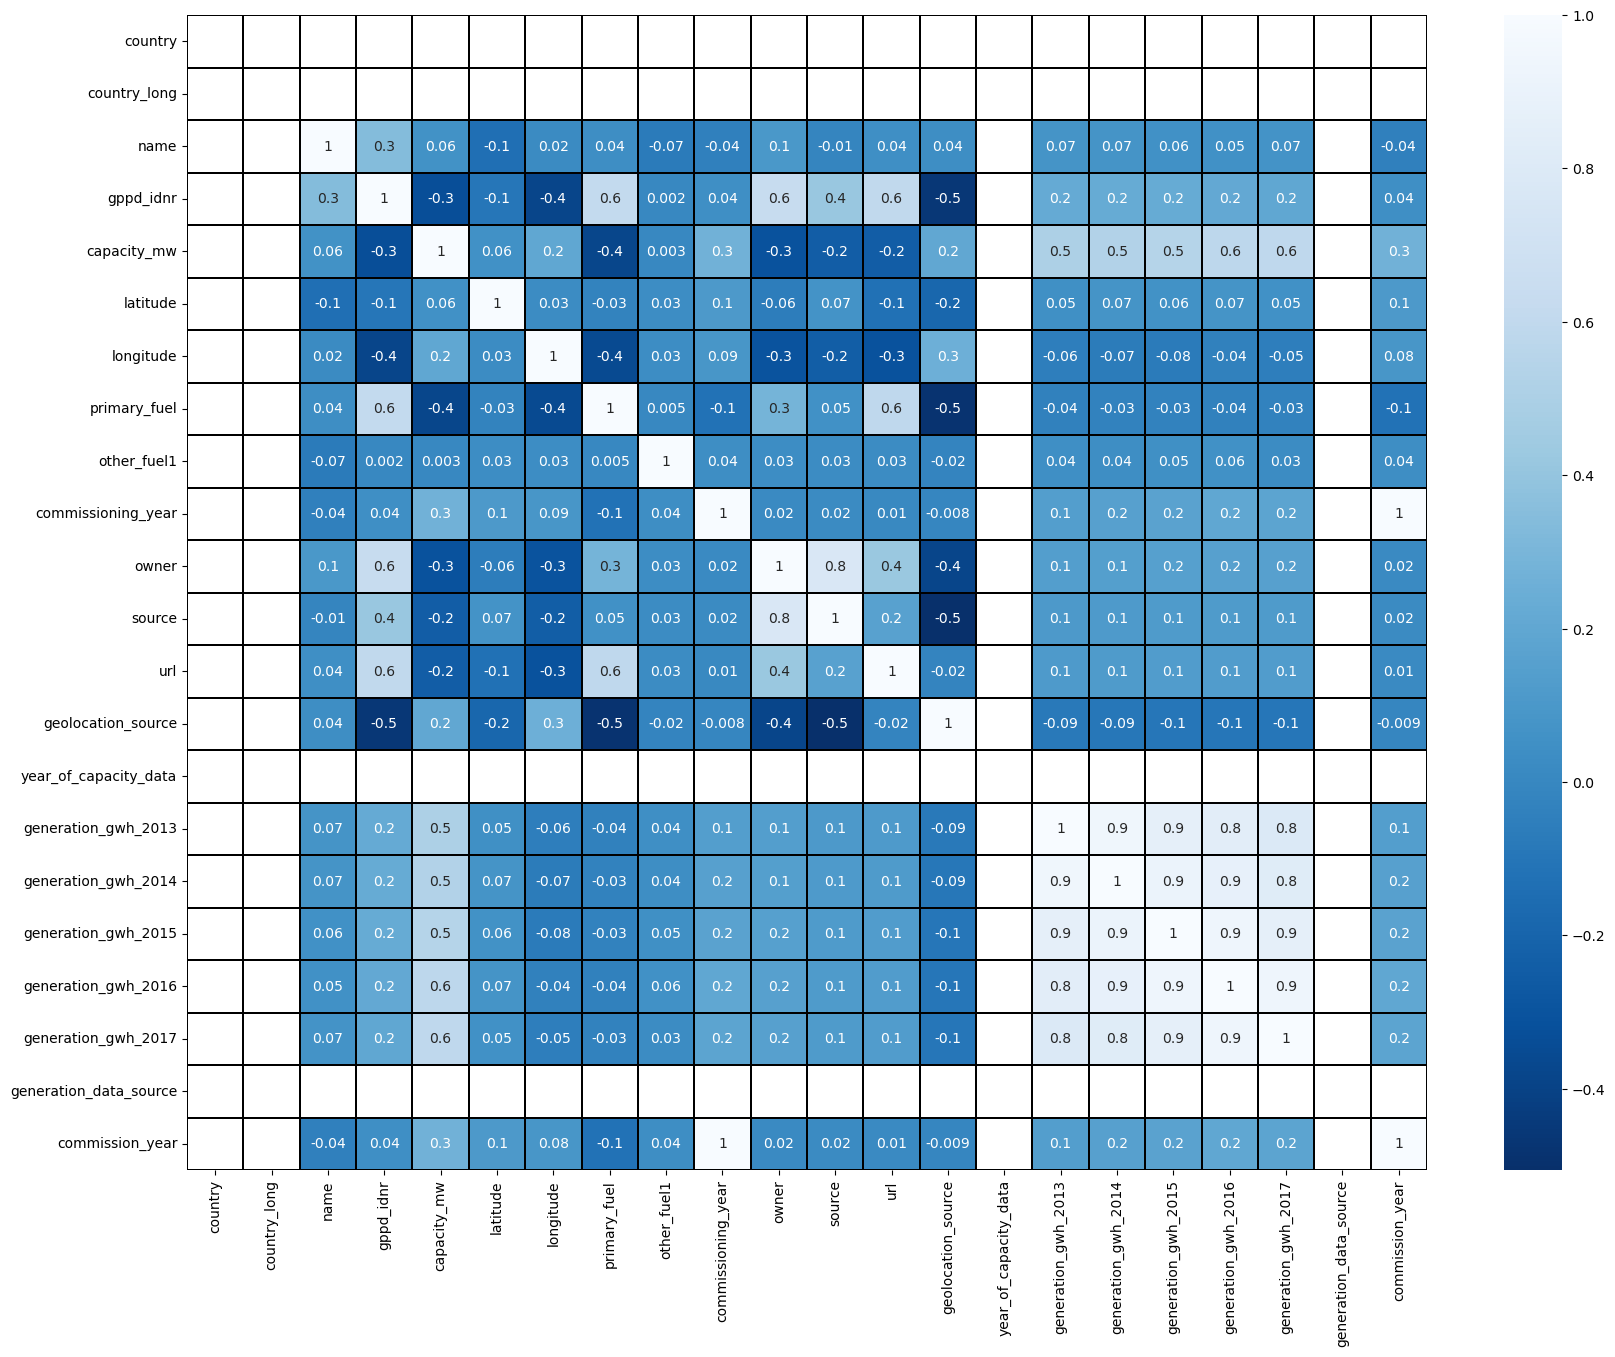

In [56]:
# visualizing the correlation matrix by plotting heatmap

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1, fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.show()

Here is the correlation between the independent variable 

In [57]:
cor['capacity_mw'].sort_values(ascending=False)

capacity_mw               1.000000
generation_gwh_2017       0.592459
generation_gwh_2016       0.577887
generation_gwh_2015       0.544498
generation_gwh_2014       0.527159
generation_gwh_2013       0.505250
commissioning_year        0.265827
commission_year           0.265121
geolocation_source        0.204698
longitude                 0.199275
name                      0.059870
latitude                  0.055623
other_fuel1               0.002672
source                   -0.241701
url                      -0.243176
owner                    -0.310560
gppd_idnr                -0.334308
primary_fuel             -0.377783
country                        NaN
country_long                   NaN
year_of_capacity_data          NaN
generation_data_source         NaN
Name: capacity_mw, dtype: float64

we can observe the positive and negative correlation features with the target variable.

# Visualizing the correlation between label and features using bar plot

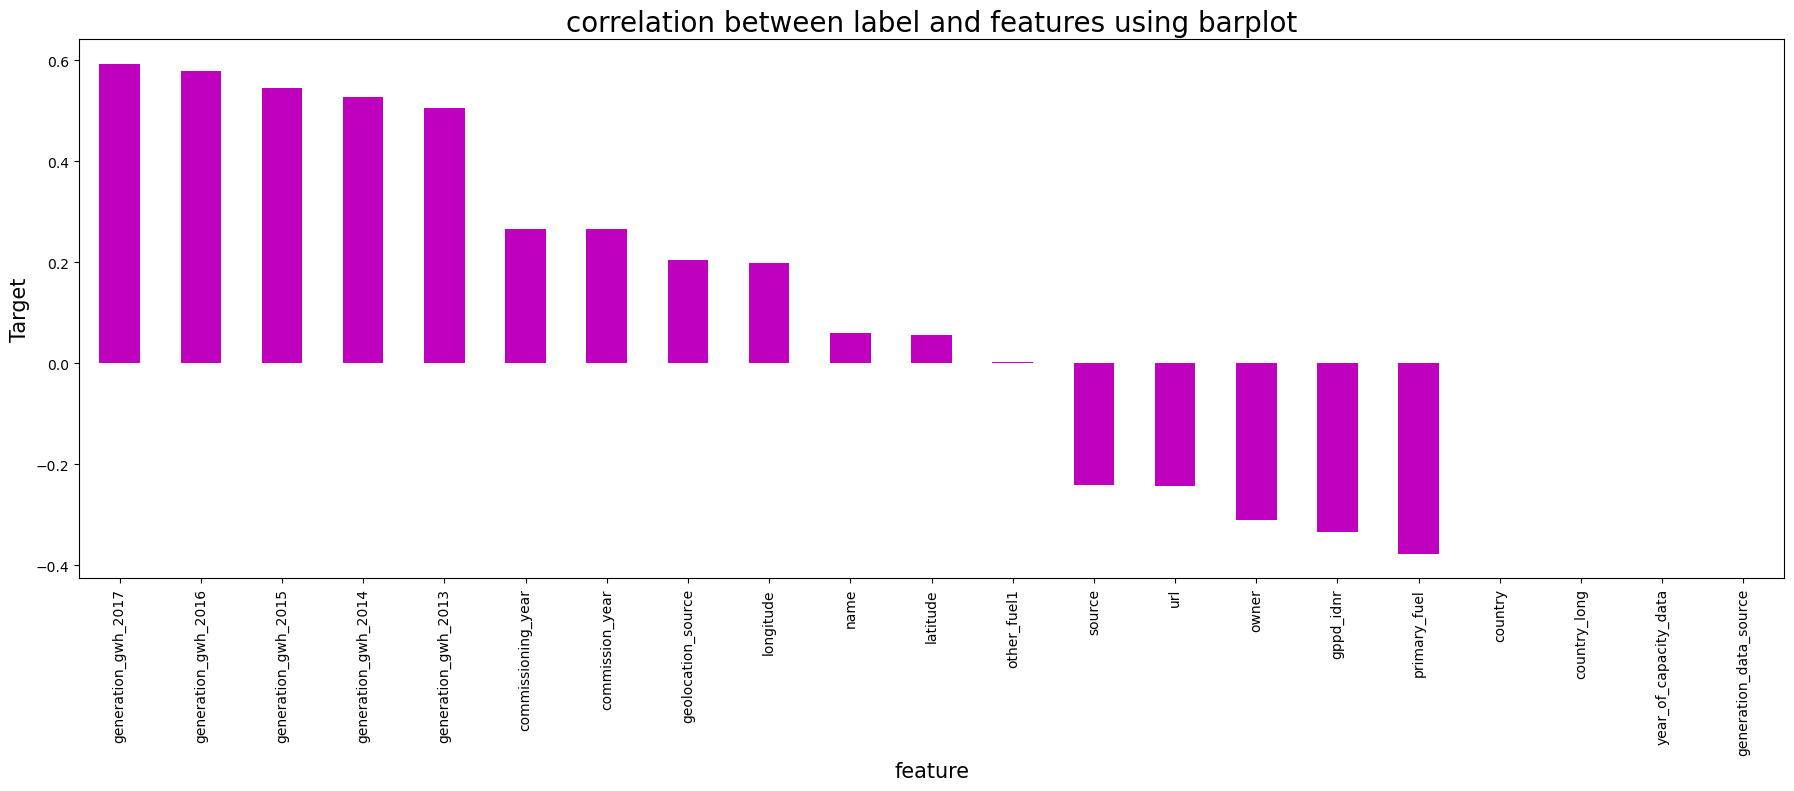

In [58]:
plt.figure(figsize=(22,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar', color='m')
plt.xlabel('feature', fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and features using barplot', fontsize=20)
plt.show()

# Separating features and label

In [59]:
x=df.drop('capacity_mw',axis=1)
y=df['capacity_mw']

# Feature Scaling using standard scaler

In [60]:
std=StandardScaler()
x=pd.DataFrame(std.fit_transform(x), columns=x.columns)
x

,country,country_long,name,gppd_idnr,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,...,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,commission_year
0,0.0,0.0,-1.730144,0.780186,1.095827,-0.891220,1.225418,0.054273,1.087424e+00,2.096722,...,0.477436,-1.084288,1.421085e-14,0.223830,0.232961,0.246762,0.249335,0.249533,0.0,1.084663
1,0.0,0.0,-1.726329,0.253704,0.614857,-0.593633,-0.967486,0.054273,1.750689e-14,2.448426,...,1.117422,0.393991,1.421085e-14,0.223830,0.232961,0.246762,0.249335,0.249533,0.0,0.001630
2,0.0,0.0,-1.722514,1.527944,0.185780,-1.747718,1.663998,0.054273,1.750689e-14,-0.656273,...,1.572523,0.393991,1.421085e-14,0.223830,0.232961,0.246762,0.249335,0.249533,0.0,0.001630
3,0.0,0.0,-1.718699,-1.730144,0.483483,2.849267,-0.528905,0.054273,5.484515e-01,-0.619890,...,-0.518097,0.393991,1.421085e-14,-0.893585,-0.886620,-0.632013,-0.600797,-0.789107,0.0,0.548344
4,0.0,0.0,-1.714884,-1.726329,0.194512,1.052999,-0.967486,0.054273,1.395409e+00,-0.619890,...,-0.518097,0.393991,1.421085e-14,-0.125874,0.504246,1.462369,1.516721,1.225448,0.0,1.390713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0.0,0.0,1.714884,0.154511,-0.745623,-0.004156,-0.967486,0.054273,1.472405e+00,-0.619890,...,-0.518097,0.393991,1.421085e-14,0.223830,0.232961,-1.859220,-1.223493,-0.634540,0.0,1.467178
904,0.0,0.0,1.718699,1.409677,-1.391185,0.167309,1.225418,0.054273,1.750689e-14,0.702033,...,-1.030086,-2.562566,1.421085e-14,0.223830,0.232961,0.246762,0.249335,0.249533,0.0,0.001630
905,0.0,0.0,1.722514,1.672918,-0.931290,-0.383870,1.663998,0.054273,1.750689e-14,-0.619890,...,2.354728,0.393991,1.421085e-14,0.223830,0.232961,0.246762,0.249335,0.249533,0.0,0.001630
906,0.0,0.0,1.726329,0.330005,0.554057,-0.780633,-0.967486,0.054273,1.750689e-14,0.423095,...,-0.176771,0.393991,1.421085e-14,0.223830,0.232961,0.246762,0.249335,0.249533,0.0,0.001630


we have scaled the data using standard scalarization method to overcome the issue of biasness.

# Checking variance inflation factor

In [61]:
# finding variance inflation factor in each scaled column i.e x.shape[1] (1/( w2))

vif=pd.DataFrame()
vif[' VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['variables']=x.columns
vif


,VIF values,variables
0,NaN,country
1,NaN,country_long
2,1.401470,name
3,4.037923,gppd_idnr
4,1.120795,latitude
5,1.281837,longitude
6,3.796523,primary_fuel
7,1.018686,other_fuel1
8,125038.318434,commissioning_year
9,3.819324,owner


Here we find the features commissioning_year and commission_year have vif value greater than 10 which means they have correlation with others features. we will drop one of the column first, if the same issue exist then we will try to remove the column having high vif.

In [62]:
x.drop('commissioning_year',axis=1,inplace=True)

In [63]:
# again checking vif value to confirm whether multicollinearity still exists or not

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['variables']=x.columns
vif

,VIF values,variables
0,NaN,country
1,NaN,country_long
2,1.393108,name
3,4.025555,gppd_idnr
4,1.120794,latitude
5,1.274630,longitude
6,3.783997,primary_fuel
7,1.018171,other_fuel1
8,3.795749,owner
9,3.969988,source


here we have to drop one more feature 'generation_gwh_2016'

In [64]:
x.drop('generation_gwh_2016',axis=1,inplace=True)

In [65]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['variables']=x.columns
vif

,VIF values,variables
0,NaN,country
1,NaN,country_long
2,1.392585,name
3,4.025125,gppd_idnr
4,1.119281,latitude
5,1.264736,longitude
6,3.782717,primary_fuel
7,1.015085,other_fuel1
8,3.793707,owner
9,3.968832,source


here we can consider our threshold value is 11 now it looks perfect

in the variance inflation factor value the features ('country','country_log','generation_data_source') are showing as null features that's why we have to drop this features.  

In [66]:
x.drop(['country','country_long','generation_data_source'],axis=1,inplace=True)

# Regression  modeling

In [67]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred=rfr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc > maxAccu:
        maxAccu= acc
        maxRS = i
    
print('Best Accuracy is', maxAccu,'At random state', maxRS)
        

Best Accuracy is 0.9180881435840964 At random state 107


# creating train test split

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=maxRS)

# Linear Regressor

In [69]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print(lr)
print('R2_score:', r2_score(y_test,pred_lr))
print('r2_score on training data:', r2_score(pred_train,y_train))
print('mean_squared_error', mean_squared_error(y_test,pred_lr))
print('mean_absolute_error', mean_absolute_error(y_test,pred_lr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_lr)))

LinearRegression()
R2_score: 0.7299916722454274
r2_score on training data: 0.4040102044889894
mean_squared_error 105276.01496352845
mean_absolute_error 218.9181245746531
sqrt mean_squared_error 324.46265573025266


# Decision Tree Regressor

In [70]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print(dtr)
print('r2_score',r2_score(y_test,pred_dtr))
print('r2_Score on training data', r2_score(y_train,pred_train))
print('mean_squared_error', mean_squared_error(y_test,pred_dtr))
print('mean_absolute_error', mean_absolute_error(y_test,pred_dtr))
print('sqrt mean_squared_error', np.sqrt(mean_squared_error(y_test,pred_dtr)))
      

DecisionTreeRegressor()
r2_score 0.8291086293882437
r2_Score on training data 1.0
mean_squared_error 66630.39854835164
mean_absolute_error 128.15879120879123
sqrt mean_squared_error 258.1286472833878


# SVR (Support Vector Regressor)

In [71]:
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print(svr)
print('r2score', r2_score(y_test,pred_svr))
print('r2_score on training data', r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_svr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_svr))
print('sqrt mean_squared_error', np.sqrt(mean_squared_error(y_test,pred_svr)))

SVR()
r2score -0.14036502664115869
r2_score on training data -0.16713062239264675
mean_squared_error 444627.34393023176
mean_absolute_error 288.7999915873556
sqrt mean_squared_error 666.8038271712542


# KNeighbors Regressor

In [72]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print(knn)
print('r2_score', r2_score(y_test,pred_knn))
print('r2_score on training data', r2_score(y_train,pred_train))
print('mean_squared_error', mean_squared_error(y_test,pred_knn))
print('mean_absolute_error',mean_absolute_error(y_test,pred_knn))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_knn)))

KNeighborsRegressor()
r2_score 0.8703331432259819
r2_score on training data 0.8202944232991478
mean_squared_error 50556.99602874212
mean_absolute_error 118.12395677655677
sqrt mean_squared_error 224.84882928034585


# Random Forest Regressor

In [73]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print(rfr)
print('r2_score', r2_score(y_test,pred_rfr))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_rfr))
print('mean_absolute_error', mean_absolute_error(y_test,pred_rfr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_rfr)))

RandomForestRegressor()
r2_score 0.9185671788940901
r2_score on training data 0.9723153844581175
mean_squared_error 31750.58697100841
mean_absolute_error 94.48720315018315
sqrt mean_squared_error 178.18694388480995


# Extra Trees Regressor 

In [74]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print(etr)
print('r2_score', r2_score(y_test,pred_etr))
print('r2_score on training data', r2_score(y_train,pred_train))
print('mean_squared_error', mean_squared_error(y_test,pred_etr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_etr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_etr)))


ExtraTreesRegressor()
r2_score 0.9317045709196106
r2_score on training data 0.999999998391191
mean_squared_error 26628.32910969691
mean_absolute_error 86.59131747252746
sqrt mean_squared_error 163.18188964985333


# Ada Boost Regressor


In [75]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
pred_abr=abr.predict(x_test)
pred_train=abr.predict(x_train)
print(abr)
print('r1_score', r2_score(y_test,pred_abr))
print('r2_score on training data', r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_abr))
print('mean_absolute_error',mean_absolute_error(y_test,pred_abr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_abr)))

AdaBoostRegressor()
r1_score 0.7122991006890869
r2_score on training data 0.6916519288369573
mean_squared_error 112174.33340947516
mean_absolute_error 297.472051528491
sqrt mean_squared_error 334.9243696858668


# Gradient Boosting Regressor

In [76]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print(gbr)
print('r2_score', r2_score(y_test,pred_gbr))
print('r2_score on training data', r2_score(y_train,pred_train))
print('mean_squared_error', mean_squared_error(y_test,pred_gbr))
print('mean_absolute_error', mean_absolute_error(y_test,pred_gbr))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_gbr)))

GradientBoostingRegressor()
r2_score 0.9089789646280015
r2_score on training data 0.9648552514850873
mean_squared_error 35489.02347385497
mean_absolute_error 101.7392697294221
sqrt mean_squared_error 188.38530588624732


# Ridge Regression

In [77]:
rdg=Ridge()
rdg.fit(x_train,y_train)
pred_rdg=rdg.predict(x_test)
pred_train=rdg.predict(x_train)
print(rdg)
print('r2_score', r2_score(y_test, pred_rdg))
print('r2_score on training data', r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_rdg))
print('mean_absolute_error',mean_absolute_error(y_test,pred_rdg))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_rdg)))

Ridge()
r2_score 0.7301529574515411
r2_score on training data 0.6265654978125611
mean_squared_error 105213.1300002629
mean_absolute_error 218.7697858395751
sqrt mean_squared_error 324.3657349355244


# Lasso Regression

In [78]:
ls=Lasso()
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
print(ls)
print('r2_score', r2_score(y_test,pred_ls))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,pred_ls))
print('mean_absolute_error',mean_absolute_error(y_test,pred_ls))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred_ls)))

Lasso()
r2_score 0.7307811668396172
r2_score on training data 0.6264261942149494
mean_squared_error 104968.19169969522
mean_absolute_error 217.83041613246502
sqrt mean_squared_error 323.9879499297701


# ElasticNet Regression

In [79]:
elstc=ElasticNet()
elstc.fit(x_train,y_train)
elstc_pred=elstc.predict(x_test)
pred_train=elstc.predict(x_train)
print(elstc)
print('r2_score', r2_score(y_test,elstc_pred))
print('r2_score on training data',r2_score(y_train,pred_train))
print('mean_squared_error',mean_squared_error(y_test,elstc_pred))
print('mean_absolute_error',mean_absolute_error(y_test,elstc_pred))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,elstc_pred)))

ElasticNet()
r2_score 0.68568975451386
r2_score on training data 0.5720491475453255
mean_squared_error 122549.29461681686
mean_absolute_error 220.49560240206594
sqrt mean_squared_error 350.0704137981627


# Cross validation score

In [80]:
score1=cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('difference between cross validation score and r2_score',(r2_score(y_test,pred_lr)-score1.mean())*100)

[0.60239027 0.52488395 0.61675601 0.70090204 0.67732615]
0.6244516849049
difference between cross validation score and r2_score 10.553998734052739


In [81]:
score2=cross_val_score(dtr,x,y)
print(score2)
print(score2.mean())
print('difference between the cross validation score and r2_score',(r2_score(y_test,pred_dtr)-score2.mean())*100)



[0.63476902 0.59543196 0.75455409 0.69217561 0.67577551]
0.6705412365927861
difference between the cross validation score and r2_score 15.856739279545762


In [82]:
score3=cross_val_score(svr,x,y)
print(score3)
print(score3.mean())
print('difference between the cross validation score and r2_score', (r2_score(y_test,pred_svr)-score3.mean())*100)

[-0.14815822 -0.13542972 -0.16220278 -0.20112225 -0.14771289]
-0.15892517103991716
difference between the cross validation score and r2_score 1.8560144398758471


In [83]:
score4=cross_val_score(knn,x,y)
print(score4)
print(score4.mean())
print('difference between the cross validation score and r2_score', (r2_score(y_test,pred_knn)-score4.mean())*100)

[0.73107109 0.71803045 0.69410484 0.79390027 0.82754188]
0.7529297077974374
difference between the cross validation score and r2_score 11.740343542854447


In [84]:
score5=cross_val_score(rfr,x,y)
print(score5)
print(score5.mean())
print('difference between the cross validation score and r2_score', (r2_score(y_test,pred_rfr)-score5.mean())*100)

[0.80974962 0.81667233 0.7989669  0.86020275 0.89235882]
0.8355900823338208
difference between the cross validation score and r2_score 8.29770965602693


In [85]:
score6=cross_val_score(etr,x,y)
print(score6)
print(score6.mean())
print('difference between the cross validation score and r2_score',(r2_score(y_test,pred_etr)-score6.mean())*100)

[0.8527547  0.85210993 0.80741441 0.85222502 0.89403173]
0.8517071588908562
difference between the cross validation score and r2_score 7.999741202875432


In [86]:
score7=cross_val_score(abr,x,y)
print(score7)
print(score7.mean())
print('difference between cross validation score and r2_score', (r2_score(y_test,pred_abr)-score7.mean())*100)


[0.45776292 0.2735927  0.7222888  0.75548524 0.77027846]
0.5958816239862276
difference between cross validation score and r2_score 11.641747670285929


In [87]:
score8=cross_val_score(gbr,x,y)
print(score8)
print(score8.mean())
print('difference between the cross validation score and r2_score', (r2_score(y_test,pred_gbr)-score8.mean())*100)

[0.7801522  0.80804981 0.79005731 0.83596579 0.88023784]
0.8188925916221287
difference between the cross validation score and r2_score 9.008637300587285


In [88]:
score9=cross_val_score(rdg,x,y)
print(score9)
print(score9.mean())
print('difference between the cross validation score and r2_score', (r2_score(y_test,pred_rdg)-score9.mean())*100)

[0.60320638 0.5258806  0.61658618 0.70081103 0.67765372]
0.6248275806606712
difference between the cross validation score and r2_score 10.532537679086984


In [89]:
score10=cross_val_score(ls,x,y)
print(score10)
print(score10.mean())
print('difference between the cross validation score and r2_score', (r2_score(y_test,pred_ls)-score10.mean()*100))

[0.60250974 0.52754016 0.61566665 0.70064229 0.68097869]
0.6254675082662368
difference between the cross validation score and r2_score -61.81596965978406


In [90]:
score11=cross_val_score(elstc,x,y)
print(score11)
print(score11.mean())
print('difference between the cross validation score and r2_score',(r2_score(y_test,elstc_pred)-score11.mean())*100)

[0.56433905 0.57062803 0.55659423 0.64580515 0.64666558]
0.5968064098963944
difference between the cross validation score and r2_score 8.888334461746561


# Hyper parameter tunning 

In [91]:
parameters=({'criterion':['squared_error','absolute_error','friedman_mse','poisson'],
            'random_state':[10,50,100,150],
            'max_depth':[0,10,15,20],
            'n_jobs':[-2,-1,-3,1],
            'n_estimators':[50,100,200,300]})

In [92]:
grid=GridSearchCV(ExtraTreesRegressor(),parameters,cv=5)

In [93]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [0, 10, 15, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, -3, 1],
                         'random_state': [10, 50, 100, 150]})

In [94]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 15,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 100}

In [95]:
final_model1=ExtraTreesRegressor(criterion='absolute_error',max_depth=15,n_estimators=300,n_jobs=-2,random_state=10)
final_model1.fit(x_train,y_train)
pred1=final_model1.predict(x_test)
print('r2_score',r2_score(y_test,pred1))
print('mean_squared_error',mean_squared_error(y_test,pred1))
print('mean_absolute_error',mean_absolute_error(y_test,pred1))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,pred1)))

r2_score 0.9363391976562281
mean_squared_error 24821.292127793124
mean_absolute_error 85.2589253968254
sqrt mean_squared_error 157.54774554970035


In [96]:
final_model2=ExtraTreesRegressor(criterion='squared_error',max_depth=21,n_estimators=1000,n_jobs=-2,random_state=10,min_samples_split=2,min_samples_leaf=1)
final_model2.fit(x_train,y_train)
final_pred2=final_model2.predict(x_test)
print('r2_score', r2_score(y_test,final_pred2))
print('mean_squared_error',mean_squared_error(y_test,final_pred2))
print('mean_absolute_error',mean_absolute_error(y_test,final_pred2))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,final_pred2)))

r2_score 0.9386428500987538
mean_squared_error 23923.100020064703
mean_absolute_error 84.26221261886381
sqrt mean_squared_error 154.6709410977534


# saving the model

In [97]:
import joblib

In [98]:
joblib.dump(final_model2,'power_plant_analysis.pkl')

['power_plant_analysis.pkl']

In [99]:
output=joblib.load('power_plant_analysis.pkl')

In [100]:
output.predict(x_test)

array([4.81373945e+02, 2.85706102e+01, 4.66492417e+01, 2.58650192e+01,
       3.36435938e+01, 2.21741058e+02, 1.24513820e+02, 6.65870854e+01,
       2.35436544e+01, 1.38270709e+03, 4.52238188e+01, 1.33511860e+01,
       1.28109838e+01, 2.40908828e+01, 1.03592604e+02, 2.78189946e+02,
       1.94961598e+01, 1.73065316e+01, 7.33877431e+01, 3.72830325e+02,
       8.09783262e+01, 3.85333385e+01, 1.02127274e+01, 1.89504088e+01,
       1.93102238e+02, 1.56180767e+01, 9.23221481e+00, 1.55466308e+03,
       1.17656697e+01, 2.99596141e+01, 1.26243222e+01, 4.60553617e+02,
       3.54196122e+01, 6.39888507e+01, 9.23036220e+02, 1.97549420e+01,
       6.33224725e+02, 7.43543784e+01, 9.96670676e+02, 5.09258192e+01,
       4.16674408e+01, 7.25981841e+01, 2.05208303e+01, 9.47057479e+01,
       1.21049767e+01, 5.03424017e+01, 9.17639176e+01, 5.54932627e+01,
       1.11535880e+02, 7.16374255e+02, 1.58082188e+02, 3.88009293e+02,
       4.53649883e+01, 1.16250800e+03, 6.21300387e+01, 1.05613184e+02,
      

# Classification model

In [101]:
df1=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/global_Power_plant_database.csv')

In [102]:
df1

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


here primary_fuel is our target variable let's build the model 

# separating the features

In [103]:
x=df.drop('primary_fuel',axis=1)
y=df['primary_fuel']

# Checking variance inflation factor

In [104]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF values,Features
0,NaN,country
1,NaN,country_long
2,1.486518e+00,name
3,4.502403e+00,gppd_idnr
4,3.129362e+00,capacity_mw
5,1.124076e+00,latitude
6,1.270968e+00,longitude
7,1.019047e+00,other_fuel1
8,1.315177e+05,commissioning_year
9,3.802907e+00,owner


we have to drop the some features becuase here it is showing null features it may decrease the model performance. let's drop it

In [105]:
x.drop(['country','country_long','generation_data_source'],axis=1,inplace=True)

In [106]:
x.columns.to_list()

['name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'other_fuel1',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'commission_year']

Here we droped those features 

In [107]:
y.value_counts()

1.0    259
3.0    250
6.0    127
7.0    123
2.0     69
0.0     50
5.0     21
4.0      9
Name: primary_fuel, dtype: int64

 as we see the target variable value is not in the equal level we have to perform the oversampling method into the dataset.

# Over Sampling by using (SMOTE)

In [108]:
smt=SMOTE()

In [109]:
x,y=smt.fit_resample(x,y)

In [110]:
y.value_counts()

6.0    259
1.0    259
7.0    259
2.0    259
3.0    259
0.0    259
5.0    259
4.0    259
Name: primary_fuel, dtype: int64

now we can see the target variable values counts is equal. 

# Modeling

In [111]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    rfr=RandomForestClassifier()
    rfr.fit(x_train,y_train)
    pred=rfr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is ',maxAccu, 'at random_state', maxRS)

Best accuracy is  0.9437299035369775 at random_state 82


# Creating train_test_split

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)

# svc (Support Vector Classifier)

In [113]:
svc=SVC()
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)
print(accuracy_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

0.6286173633440515
[[76  0  0  0  0  0  0  1]
 [17 10 11  5 30  0  0  1]
 [ 9  1 17 34 10  1  0  0]
 [ 1  0  6 56  5  1  0  0]
 [ 0  0 11 10 58  0  0  0]
 [28  0  2 43  0  2  0  0]
 [ 0  1  0  0  0  0 87  3]
 [ 0  0  0  0  0  0  0 85]]
              precision    recall  f1-score   support

         0.0       0.58      0.99      0.73        77
         1.0       0.83      0.14      0.23        74
         2.0       0.36      0.24      0.29        72
         3.0       0.38      0.81      0.52        69
         4.0       0.56      0.73      0.64        79
         5.0       0.50      0.03      0.05        75
         6.0       1.00      0.96      0.98        91
         7.0       0.94      1.00      0.97        85

    accuracy                           0.63       622
   macro avg       0.65      0.61      0.55       622
weighted avg       0.66      0.63      0.57       622



# Decision Tree Classifier

In [114]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
print(accuracy_score(y_test,dtc_pred))
print(confusion_matrix(y_test,dtc_pred))
print(classification_report(y_test,dtc_pred))

0.8617363344051447
[[72  3  1  0  0  1  0  0]
 [ 5 48  5  4  7  5  0  0]
 [ 0  9 55  1  0  7  0  0]
 [ 0  5 11 46  4  3  0  0]
 [ 0  0  1  5 73  0  0  0]
 [ 0  3  4  1  0 67  0  0]
 [ 0  0  1  0  0  0 90  0]
 [ 0  0  0  0  0  0  0 85]]
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        77
         1.0       0.71      0.65      0.68        74
         2.0       0.71      0.76      0.73        72
         3.0       0.81      0.67      0.73        69
         4.0       0.87      0.92      0.90        79
         5.0       0.81      0.89      0.85        75
         6.0       1.00      0.99      0.99        91
         7.0       1.00      1.00      1.00        85

    accuracy                           0.86       622
   macro avg       0.85      0.85      0.85       622
weighted avg       0.86      0.86      0.86       622



# Random Forest Classifier

In [115]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print(accuracy_score(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

0.9180064308681672
[[75  2  0  0  0  0  0  0]
 [ 2 56  3  3  7  3  0  0]
 [ 0  2 61  3  0  6  0  0]
 [ 0  5  9 50  3  2  0  0]
 [ 0  0  0  0 78  0  0  1]
 [ 0  0  0  0  0 75  0  0]
 [ 0  0  0  0  0  0 91  0]
 [ 0  0  0  0  0  0  0 85]]
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        77
         1.0       0.86      0.76      0.81        74
         2.0       0.84      0.85      0.84        72
         3.0       0.89      0.72      0.80        69
         4.0       0.89      0.99      0.93        79
         5.0       0.87      1.00      0.93        75
         6.0       1.00      1.00      1.00        91
         7.0       0.99      1.00      0.99        85

    accuracy                           0.92       622
   macro avg       0.91      0.91      0.91       622
weighted avg       0.92      0.92      0.92       622



# Ada Boost Classifier

In [116]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_pred=abc.predict(x_test)
print(accuracy_score(y_test,abc_pred))
print(confusion_matrix(y_test,abc_pred))
print(classification_report(y_test,abc_pred))


0.41318327974276525
[[77  0  0  0  0  0  0  0]
 [39  0  0  2 33  0  0  0]
 [68  0  0  0  4  0  0  0]
 [42  0  0 24  3  0  0  0]
 [ 0  0  0  7 71  0  0  1]
 [68  0  0  7  0  0  0  0]
 [ 1  0  0  0  0  0  0 90]
 [ 0  0  0  0  0  0  0 85]]
              precision    recall  f1-score   support

         0.0       0.26      1.00      0.41        77
         1.0       0.00      0.00      0.00        74
         2.0       0.00      0.00      0.00        72
         3.0       0.60      0.35      0.44        69
         4.0       0.64      0.90      0.75        79
         5.0       0.00      0.00      0.00        75
         6.0       0.00      0.00      0.00        91
         7.0       0.48      1.00      0.65        85

    accuracy                           0.41       622
   macro avg       0.25      0.41      0.28       622
weighted avg       0.25      0.41      0.28       622



# Extra Trees Classifier

In [117]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
etc_pred=etc.predict(x_test)
print(accuracy_score(y_test,etc_pred))
print(confusion_matrix(y_test,etc_pred))
print(classification_report(y_test,etc_pred))

0.9244372990353698
[[77  0  0  0  0  0  0  0]
 [ 5 53  4  5  3  4  0  0]
 [ 0  1 62  4  0  5  0  0]
 [ 0  8  7 53  0  1  0  0]
 [ 0  0  0  0 79  0  0  0]
 [ 0  0  0  0  0 75  0  0]
 [ 0  0  0  0  0  0 91  0]
 [ 0  0  0  0  0  0  0 85]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        77
         1.0       0.85      0.72      0.78        74
         2.0       0.85      0.86      0.86        72
         3.0       0.85      0.77      0.81        69
         4.0       0.96      1.00      0.98        79
         5.0       0.88      1.00      0.94        75
         6.0       1.00      1.00      1.00        91
         7.0       1.00      1.00      1.00        85

    accuracy                           0.92       622
   macro avg       0.92      0.92      0.92       622
weighted avg       0.92      0.92      0.92       622



# Gradient Boosting Classifier

In [118]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred=gbc.predict(x_test)
print(accuracy_score(y_test,gbc_pred))
print(confusion_matrix(y_test,gbc_pred))
print(classification_report(y_test,gbc_pred))

0.8954983922829582
[[76  1  0  0  0  0  0  0]
 [ 4 51  7  3  7  2  0  0]
 [ 0  7 54  3  0  8  0  0]
 [ 0  6  9 50  2  2  0  0]
 [ 0  0  1  0 78  0  0  0]
 [ 0  0  1  0  0 74  0  0]
 [ 0  1  0  0  0  0 90  0]
 [ 0  0  0  0  0  1  0 84]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97        77
         1.0       0.77      0.69      0.73        74
         2.0       0.75      0.75      0.75        72
         3.0       0.89      0.72      0.80        69
         4.0       0.90      0.99      0.94        79
         5.0       0.85      0.99      0.91        75
         6.0       1.00      0.99      0.99        91
         7.0       1.00      0.99      0.99        85

    accuracy                           0.90       622
   macro avg       0.89      0.89      0.89       622
weighted avg       0.89      0.90      0.89       622



# Cross validation score.

In [119]:
score1=cross_val_score(svc,x,y,cv=5)
print(score1)
print(score1.mean())
print('difference between the cross validation and accuracy_score',(accuracy_score(y_test,svc_pred)-score1.mean())*100)

[0.58313253 0.57349398 0.62077295 0.58695652 0.53381643]
0.5796344799487807
difference between the cross validation and accuracy_score 4.898288339527079


In [120]:
score2=cross_val_score(dtc,x,y)
print(score2)
print(score2.mean())
print('difference between the cross validation score and accuracy score', (accuracy_score(y_test,dtc_pred)-score2.mean())*100)

[0.80963855 0.85301205 0.89855072 0.88405797 0.86956522]
0.8629649030906232
difference between the cross validation score and accuracy score -0.12285686854784927


In [121]:
score3=cross_val_score(rfc,x,y)
print(score3)
print(score3.mean())
print('difference between the cross validation score and accuracy score',(accuracy_score(y_test,rfc_pred)-score3.mean())*100)

[0.87951807 0.89879518 0.93961353 0.92028986 0.92753623]
0.9131505733077235
difference between the cross validation score and accuracy score 0.48558575604437104


In [122]:
score4=cross_val_score(etc,x,y)
print(score4)
print(score4.mean())
print('difference between the cross validation score and accuracy score',(accuracy_score(y_test,etc_pred)-score4.mean())*100)

[0.8939759  0.90120482 0.93719807 0.92028986 0.91062802]
0.9126593329841104
difference between the cross validation score and accuracy score 1.1777966051259359


In [123]:
score5=cross_val_score(abc,x,y)
print(score5)
print(score5.mean())
print('difference between the cross validation score ',(accuracy_score(y_test,abc_pred)-score5.mean())*100)

[0.52048193 0.53253012 0.56521739 0.46135266 0.53140097]
0.5221966125371049
difference between the cross validation score  -10.901333279433967


In [124]:
score6=cross_val_score(gbc,x,y)
print(score6)
print(score6.mean())
print('difference between the cross validation and accuracy score',(accuracy_score(y_test,gbc_pred))*100)

[0.86506024 0.8746988  0.93478261 0.90096618 0.87922705]
0.8909469763110414
difference between the cross validation and accuracy score 89.54983922829582


Here our Random Forest Classifier is giving the high accuracy it means this model is well performing model we will go further with this model.

# Hyper parameter tunning

In [125]:
param=({'criterion':['gini','entropy','log_loss'],
       'n_estimators':[100,150,200,250,300],
       'max_depth':[10,15,20,12,5],
       'max_features':['sqrt','log2']})

In [126]:
grid=GridSearchCV(RandomForestClassifier(),param,cv=5)

In [127]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 15, 20, 12, 5],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [128]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'log2',
 'n_estimators': 200}

In [129]:
final_model1=RandomForestClassifier(criterion='entropy',max_depth=30,max_features='log2',n_estimators=300)
final_model1.fit(x_train,y_train)
pred1=final_model1.predict(x_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

0.9163987138263665
[[77  0  0  0  0  0  0  0]
 [ 2 55  3  4  7  3  0  0]
 [ 0  1 60  5  0  6  0  0]
 [ 0  6  8 50  2  3  0  0]
 [ 0  0  0  0 78  0  0  1]
 [ 0  1  0  0  0 74  0  0]
 [ 0  0  0  0  0  0 91  0]
 [ 0  0  0  0  0  0  0 85]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        77
         1.0       0.87      0.74      0.80        74
         2.0       0.85      0.83      0.84        72
         3.0       0.85      0.72      0.78        69
         4.0       0.90      0.99      0.94        79
         5.0       0.86      0.99      0.92        75
         6.0       1.00      1.00      1.00        91
         7.0       0.99      1.00      0.99        85

    accuracy                           0.92       622
   macro avg       0.91      0.91      0.91       622
weighted avg       0.92      0.92      0.91       622



In [130]:
final_model2=RandomForestClassifier(criterion='gini',max_depth=20,max_features='sqrt',n_estimators=200)
final_model2.fit(x_train,y_train)
pred2=final_model2.predict(x_test)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

0.9180064308681672
[[75  2  0  0  0  0  0  0]
 [ 2 55  4  4  6  3  0  0]
 [ 0  1 62  4  0  5  0  0]
 [ 0  5  9 50  3  2  0  0]
 [ 0  0  0  0 78  0  0  1]
 [ 0  0  0  0  0 75  0  0]
 [ 0  0  0  0  0  0 91  0]
 [ 0  0  0  0  0  0  0 85]]
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        77
         1.0       0.87      0.74      0.80        74
         2.0       0.83      0.86      0.84        72
         3.0       0.86      0.72      0.79        69
         4.0       0.90      0.99      0.94        79
         5.0       0.88      1.00      0.94        75
         6.0       1.00      1.00      1.00        91
         7.0       0.99      1.00      0.99        85

    accuracy                           0.92       622
   macro avg       0.91      0.91      0.91       622
weighted avg       0.92      0.92      0.92       622



# Saving the final model

In [131]:
import joblib 

In [132]:
joblib.dump(final_model2,'power_plant_analysis.pkl')

['power_plant_analysis.pkl']

In [133]:
result=joblib.load('power_plant_analysis.pkl')

In [134]:
output=result.predict(x_test)


In [135]:
a=np.array(y_test)
df=pd.DataFrame()
df['prediction']=output
df['actual']=a
df

,prediction,actual
0,6.0,6.0
1,2.0,2.0
2,4.0,4.0
3,5.0,5.0
4,5.0,5.0
...,...,...
617,6.0,6.0
618,5.0,5.0
619,7.0,7.0
620,3.0,3.0
